In [1]:
!pip install ultralytics
!pip install torch torchvision torchaudio

  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyyaml-6.0.3-cp311-cp311-win_amd64.whl.metadata (2.4 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.4-cp311-cp311-win_amd64.whl.metadata (38 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.1 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 1.7 MB/s  0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 3.2 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 3.1 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 M

In [ ]:
from ultralytics import YOLO
import torch
import yaml
from google.colab import drive
import pandas as pd
import json
import re
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_yaml_path = '/content/drive/MyDrive/OCR/dso.v6-mr-yucky-1.yolov8-obb/data.yaml'
with open(dataset_yaml_path, 'r') as file:
    data_config = yaml.safe_load(file)

model = YOLO("yolov8m.pt")

Mounted at /content/drive


In [ ]:
# Train
model.train(
    data=dataset_yaml_path,
    epochs=500,
    batch=16,
    imgsz=640,
    patience=50,
    device=0,  # or "cpu"
    name="custom_yolov8m",
    project="/content/drive/MyDrive/OCR",  # save weights to Drive
    verbose=True,
    cache=False # Disable caching on Google Drive
)

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/OCR/dso.v6-mr-yucky-1.yolov8-obb/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=500, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=custom_yolov8m10, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d7c28187590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,

In [ ]:
import torch
from ultralytics import YOLO

# Load model
model = YOLO('/content/drive/MyDrive/OCR/custom_yolov8m10/weights/best.pt')
core_model = model.model
core_model.eval()

# Use CPU or CUDA   
device = 'cuda' if torch.cuda.is_available() else 'cpu'
core_model.to(device)

# Dummy input - same shape as during inference
dummy_input = torch.zeros(1, 3, 640, 640).to(device)

# Forward once to "warm up" any dynamic behavior
with torch.no_grad():
    _ = core_model(dummy_input)

# Trace
traced = torch.jit.trace(core_model, dummy_input, strict=False)

# Save
traced.save('/content/drive/MyDrive/OCR/yolov8_jit_traced.pt')


/usr/local/lib/python3.12/dist-packages/ultralytics/nn/modules/head.py:161: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.dynamic or self.shape != shape:


## Test Model


Found 69 images in the test set directory.
Processing single image: image_4ead66d9-cbc2-4283-a3fc-c8c809ec8851_jpg.rf.adabedf05ef8239f061b22f65fc20521.jpg

image 1/1 /content/drive/MyDrive/OCR/dso.v4-add-auto-labelling-dataset.yolov8-obb/test/images/image_4ead66d9-cbc2-4283-a3fc-c8c809ec8851_jpg.rf.adabedf05ef8239f061b22f65fc20521.jpg: 640x640 1 ast_logo, 1 ce_mark, 1 cib_mark, 1 eac_label, 1 lion_mark, 1 mattel_logo, 1 mc, 1 mr_yucky, 1 no_compulsorio_logo, 1 small_part_warning_logo, 1425.5ms
Speed: 2.9ms preprocess, 1425.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


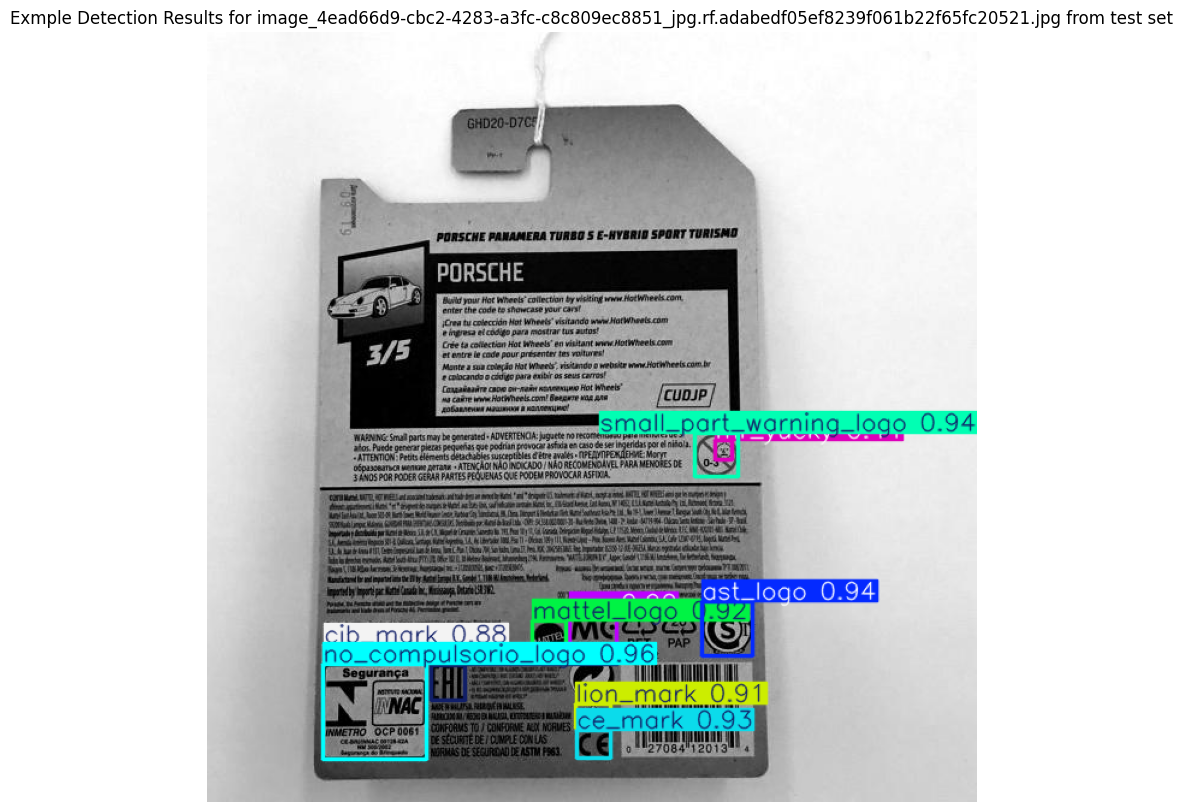

Detections for image_4ead66d9-cbc2-4283-a3fc-c8c809ec8851_jpg.rf.adabedf05ef8239f061b22f65fc20521.jpg:
  Label: no_compulsorio_logo, Confidence: 0.96, Box: [96.38, 525.70, 182.32, 604.73]
  Label: small_part_warning_logo, Confidence: 0.94, Box: [405.89, 333.57, 441.45, 369.44]
  Label: ast_logo, Confidence: 0.94, Box: [411.80, 473.40, 453.34, 518.81]
  Label: ce_mark, Confidence: 0.93, Box: [307.05, 580.98, 335.79, 603.30]
  Label: eac_label, Confidence: 0.92, Box: [186.07, 526.00, 214.78, 555.34]
  Label: mattel_logo, Confidence: 0.92, Box: [270.45, 489.75, 298.74, 517.99]
  Label: lion_mark, Confidence: 0.91, Box: [306.11, 558.83, 335.87, 578.87]
  Label: mc, Confidence: 0.90, Box: [301.97, 483.62, 340.05, 509.04]
  Label: cib_mark, Confidence: 0.88, Box: [97.61, 509.77, 159.09, 523.41]
  Label: mr_yucky, Confidence: 0.44, Box: [422.82, 339.23, 436.62, 355.28]


In [ ]:
best_model_path = "/content/drive/MyDrive/OCR/custom_yolov8m10/weights/best.pt"
model = YOLO(best_model_path)

test_images_dir = "/content/drive/MyDrive/OCR/dso.v4-add-auto-labelling-dataset.yolov8-obb/test/images"

import glob
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

image_files = glob.glob(os.path.join(test_images_dir, "*.jpg")) + \
                glob.glob(os.path.join(test_images_dir, "*.jpeg")) + \
                glob.glob(os.path.join(test_images_dir, "*.png"))

if image_files:
    print(f"Found {len(image_files)} images in the test set directory.")

    single_image_file = image_files[2]
    print(f"Processing single image: {os.path.basename(single_image_file)}")

    results = model(single_image_file)

    for result in results:
        img = result.orig_img
        annotated_img = result.plot()
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Exmple Detection Results for {os.path.basename(single_image_file)} from test set")
        plt.axis("off")
        plt.show()

        print(f"Detections for {os.path.basename(single_image_file)}:")
        for box in result.boxes:
            cls_id = int(box.cls[0].item())
            label = result.names[cls_id]
            confidence = float(box.conf[0].item())
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            print(f"  Label: {label}, Confidence: {confidence:.2f}, Box: [{x1:.2f}, {y1:.2f}, {x2:.2f}, {y2:.2f}]")
else:
    print("No images found in the test set directory.")

In [ ]:
!pip install PyMuPDF

from ultralytics import YOLO
import torch
import json
import os
import fitz  # PyMuPDF
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torchvision
from google.colab import drive

In [ ]:
model = YOLO("/content/drive/MyDrive/OCR/custom_yolov8m10/weights/best.pt")

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

def pdf_to_images(pdf_path, output_folder, resolution_factor=2):
    """
    Converts each page of a PDF file into images with higher resolution.
    Returns list of image paths.
    """
    image_paths = []
    try:
        doc = fitz.open(pdf_path)
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        if doc.page_count > 0:
             page = doc.load_page(0)
             default_dpi = 72.0
             dpi = default_dpi * resolution_factor
             print(f"Estimated DPI from PDF: {dpi}")

        mat = fitz.Matrix(resolution_factor, resolution_factor)
        for page_num in range(doc.page_count):
            page = doc.load_page(page_num)
            pix = page.get_pixmap(matrix=mat)
            output_path = os.path.join(output_folder, f"page_{page_num+1}.png")
            pix.save(output_path)
            print(f"Saved {output_path}")
            image_paths.append(output_path)  # ✅ Collect image paths
        doc.close()
        print(f"Converted {pdf_path} to images in {output_folder}")
        return image_paths
    except Exception as e:
        print(f"Error converting PDF to images: {e}")
        return []  # ✅ Return empty list on error

def process_input(input_path, resolution_factor=2):
    """
    Processes input (image, folder, or PDF) and returns a list of image paths and estimated DPI.
    Returns a list of (image_path, dpi) tuples.

    Args:
        input_path: Path to image, folder, or PDF
        resolution_factor: Resolution multiplier for PDF conversion (default: 2)
    """
    image_info_list = []
    if os.path.isdir(input_path):
        image_paths = [os.path.join(input_path, f) for f in os.listdir(input_path)
                       if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        for img_path in image_paths:
            dpi = None
            try:
                with Image.open(img_path) as img:
                    dpi = img.info.get('dpi', (None, None))[0]
                    if dpi is not None:
                        print(f"Found DPI in image metadata for {os.path.basename(img_path)}: {dpi}")
            except Exception as e:
                print(f"Could not read DPI from {os.path.basename(img_path)} metadata: {e}")
            image_info_list.append((img_path, dpi))
        return image_info_list

    elif input_path.lower().endswith('.pdf'):
        output_folder = "/content/pdf_images"
        image_paths = pdf_to_images(input_path, output_folder, resolution_factor)
        # Calculate DPI from resolution factor (base DPI = 72)
        dpi = 72.0 * resolution_factor  # ✅ Dynamic calculation
        image_info_list = [(img_path, dpi) for img_path in image_paths]
        return image_info_list

    elif input_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        dpi = None
        try:
            with Image.open(input_path) as img:
                dpi = img.info.get('dpi', (None, None))[0]
                if dpi is not None:
                     print(f"Found DPI in image metadata for {os.path.basename(input_path)}: {dpi}")
        except Exception as e:
             print(f"Could not read DPI from {os.path.basename(input_path)} metadata: {e}")
        return [(input_path, dpi)]
    else:
        raise ValueError("Unsupported input format. Provide an image, folder, or PDF.")

def tile_image(image: Image.Image, tile_size: int, overlap: int):
    """
    Splits a high-resolution image into overlapping tiles.
    """
    tiles_info = []
    width, height = image.size

    for y in range(0, height, tile_size - overlap):
        for x in range(0, width, tile_size - overlap):
            # Define tile boundaries
            x1 = x
            y1 = y
            x2 = min(x + tile_size, width)
            y2 = min(y + tile_size, height)

            # Crop tile
            tile = image.crop((x1, y1, x2, y2))

            tiles_info.append({
                'tile': tile,
                'offset_x': x1,
                'offset_y': y1
            })

    return tiles_info

input_path = "/content/drive/MyDrive/OCR/HGY16_HW26_JLG31-JKG13-JA10_HW MetroSketch_5-Pack_21A_A3_cropped.pdf"
# input_path = "/content/drive/MyDrive/OCR/HXD63_HW26_MIX3-JA10_POP CULTURE_21A_A6 - Copy_cropped-1.pdf"

tile_size = 640
overlap = 100
confidence_threshold = 0.25
inches_per_mm = 25.4

image_info_list = process_input(input_path)
all_results = []

if image_info_list:
    img_path, img_dpi = image_info_list[0]
    img_pil = Image.open(img_path).convert("RGB")
    width, height = img_pil.size
    print(f"Processing image: {img_path} ({width}x{height} pixels)")
    if img_dpi is not None:
        print(f"Image DPI: {img_dpi}")
    else:
        print("Warning: Could not determine image DPI. Millimeter measurements will not be accurate.")


    output = {
        "image_path": img_path,
        "image_shape_pixels": {"height": height, "width": width},
        "image_dpi": img_dpi,
        "labels": []
    }

    class_names = model.names
    all_detections = []

    def append_detections(result_obj, offset_x=0.0, offset_y=0.0, source="tile"):
        if result_obj is None or not getattr(result_obj, "boxes", None):
            return
        for box in result_obj.boxes:
            cls_id = int(box.cls)
            cls_name = class_names[cls_id]
            x1, y1, x2, y2 = [float(v) for v in box.xyxy[0].tolist()]
            confidence = float(box.conf[0].item())
            x1_global = x1 + float(offset_x)
            y1_global = y1 + float(offset_y)
            x2_global = x2 + float(offset_x)
            y2_global = y2 + float(offset_y)
            all_detections.append({
                "label": cls_name,
                "x1": x1_global,
                "y1": y1_global,
                "x2": x2_global,
                "y2": y2_global,
                "confidence": confidence,
                "class_id": cls_id,
                "source": source,
            })


    if width > tile_size or height > tile_size:
         tiles_info = tile_image(img_pil, tile_size, overlap)
         print(f"Generated {len(tiles_info)} tiles.")
         for tile_info in tiles_info:
            tile_img = tile_info['tile']
            tile_x, tile_y = tile_info['offset_x'], tile_info['offset_y']
            results = model(tile_img, conf=confidence_threshold, device=device)[0]

    #         for box in results.boxes:
    #             cls_id = int(box.cls)
    #             cls_name = class_names[cls_id]
    #             x1, y1, x2, y2 = box.xyxy[0].tolist()
    #             confidence = float(box.conf[0].item())
    #             all_detections.append({
    #                 "label": cls_name,
    #                 "x1": x1 + tile_x,
    #                 "y1": y1 + tile_y,
    #                 "x2": x2 + tile_x,
    #                 "y2": y2 + tile_y,
    #                 "confidence": confidence,
    #                 "class_id": cls_id
    #             })
    # else:
    #     results = model(img_pil, conf=confidence_threshold, device=device)[0]
    #     for box in results.boxes:
    #         cls_id = int(box.cls)
    #         cls_name = class_names[cls_id]
    #         x1, y1, x2, y2 = box.xyxy[0].tolist()
    #         confidence = float(box.conf[0].item())
    #         all_detections.append({
    #             "label": cls_name,
    #             "x1": x1,
    #             "y1": y1,
    #             "x2": x2,
    #             "y2": y2,
    #             "confidence": confidence,
    #             "class_id": cls_id
    #         })
            append_detections(results, offset_x=tile_x, offset_y=tile_y, source="tile")

    full_image_result = model(img_pil, conf=confidence_threshold, device=device)[0]
    append_detections(full_image_result, source="full")

    if all_detections:
        boxes = torch.tensor([[d['x1'], d['y1'], d['x2'], d['y2']] for d in all_detections], dtype=torch.float32)
        scores = torch.tensor([d['confidence'] for d in all_detections], dtype=torch.float32)
        class_ids = torch.tensor([d['class_id'] for d in all_detections], dtype=torch.int64)

        keep_indices = []
        for cls in torch.unique(class_ids):
            cls_indices = (class_ids == cls).nonzero(as_tuple=True)[0]
            cls_boxes = boxes[cls_indices]
            cls_scores = scores[cls_indices]
            indices_to_keep_cls = torchvision.ops.nms(cls_boxes, cls_scores, iou_threshold=0.3)
            keep_indices.extend(cls_indices[indices_to_keep_cls].tolist())

        keep_indices.sort()
        filtered_detections = [all_detections[i] for i in keep_indices]

        for d in filtered_detections:
            x1_px, y1_px, x2_px, y2_px = d["x1"], d["y1"], d["x2"], d["y2"]
            width_px = x2_px - x1_px
            height_px = y2_px - y1_px

            x_mm, y_mm, width_mm, height_mm = None, None, None, None
            if img_dpi is not None:
                x_in = x1_px / img_dpi
                y_in = y1_px / img_dpi
                width_in = width_px / img_dpi
                height_in = height_px / img_dpi

                x_mm = x_in * inches_per_mm
                y_mm = y_in * inches_per_mm
                width_mm = width_in * inches_per_mm
                height_mm = height_in * inches_per_mm

            output["labels"].append({
                "label": d["label"],
                "confidence": d["confidence"],
                "box_pixels": {"x": x1_px, "y": y1_px, "width": width_px, "height": height_px},
                "box_mm": {"x": x_mm, "y": y_mm, "width": width_mm, "height": height_mm} if x_mm is not None else None,
            })

    all_results.append(output)

    results_for_plot = model(img_pil, conf=confidence_threshold, device=device)[0]
    annotated_img = results_for_plot.plot()


    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    print(json.dumps(all_results, indent=2))

else:
    print("No images found or extracted to process.")

Using device: cpu


NameError: name 'Image' is not defined

In [ ]:
!pip install PyMuPDF

## CHECK FILES

In [ ]:
!ls "/content/drive/MyDrive/OCR/custom_yolov8m6/weights"

best.pt  last.pt


In [ ]:
import os

print(os.path.exists("/content/drive/MyDrive/OCR/custom_yolov8m6/weights/best.pt"))

True


## **BACKEND**
*old backend code, must be update again*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/OCR/custom_yolov8m2/weights/best.torchscript'))

True


In [ ]:
!pip install flask flask-cors torch torchvision torchaudio ultralytics opencv-python numpy pillow pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import torch
from ultralytics import YOLO
import cv2
import numpy as np
import base64
import io
from PIL import Image
from pyngrok import ngrok
import traceback

app = Flask(__name__)
CORS(app, resources={r"/*": {
    "origins": ["http://localhost:5173", "http://127.0.0.1:5173", "*"],
    "methods": ["GET", "POST", "OPTIONS"],
    "allow_headers": ["Content-Type", "Authorization", "Accept", "Origin"],
    "supports_credentials": False,
    "max_age": 3600
}})

try:
    symbol_model = YOLO('/content/drive/MyDrive/OCR/custom_yolov8m2/weights/best.torchscript')
    print("Symbol detection model loaded successfully")
except Exception as e:
    print(f"Error loading symbol detection model: {str(e)}")
    symbol_model = None

def array_to_base64(img_array):
    img = Image.fromarray(img_array)
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

@app.route('/detect_symbols', methods=['POST'])
def detect_symbols():
    try:
        print("Received request at /detect_symbols")
        if 'image' not in request.files:
            print("No image in request")
            return jsonify({'error': 'No image provided'}), 400

        file = request.files['image']
        print(f"Received file: {file.filename}")
        img_bytes = file.read()

        img = Image.open(io.BytesIO(img_bytes)).convert("RGB")
        width, height = img.size

        DPI = img.info.get("dpi", (300, 300))[0]

        # Hitung ukuran gambar dalam cm
        width_cm = (width / DPI) * 2.54
        height_cm = (height / DPI) * 2.54

        # Run inference
        results = symbol_model(img)
        result = results[0]

        # Prepare output format
        response_data = {
            "image_shape": {
                "height": height,
                "width": width,
                "height_cm": height_cm,
                "width_cm": width_cm
            },
            "labels": []
        }

        # Extract boxes
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            cls_id = int(box.cls[0].item())
            label = result.names[cls_id]
            confidence = float(box.conf[0].item())

            x = x1
            y = y1
            w = x2 - x1
            h = y2 - y1

            response_data["labels"].append({
                "label": label,
                "confidence": confidence,
                "x": x,
                "y": y,
                "width": w,
                "height": h,
                "width_cm": width_cm,
                "height_cm": height_cm
            })

        # Get annotated image as base64
        annotated_img = result.plot()
        buffered = io.BytesIO()
        Image.fromarray(annotated_img).save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode()

        # Add visualization to response
        response_data["visualization"] = img_str

        return jsonify(response_data)

    except Exception as e:
        print(f"Error in /detect_symbols endpoint: {str(e)}")
        print(traceback.format_exc())
        return jsonify({'error': str(e)}), 500

# server endpoint
@app.route('/status', methods=['GET'])
def status():
    return jsonify({
        'status': 'running',
        'message': 'Symbol detection API is ready',
        'models_loaded': symbol_model is not None
    })

# spesific header cors
@app.after_request
def after_request(response):
    response.headers.add('Access-Control-Allow-Origin', '*')
    response.headers.add('Access-Control-Allow-Headers', 'Content-Type,Authorization')
    response.headers.add('Access-Control-Allow-Methods', 'GET,PUT,POST,DELETE,OPTIONS')
    return response

# AUTH TOKEN NGROK
ngrok.set_auth_token("2uur1vATkMOsHh6WghStznXIjlN_3X2E6KuRkagGRTb8nEDCd")

ngrok_tunnel = ngrok.connect(5000)
print('Symbol Detection API URL:', ngrok_tunnel.public_url)

# Run Flask
app.run(host='0.0.0.0', port=5000)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Symbol detection model loaded successfully
Symbol Detection API URL: https://8f8cd2033528.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


Received request at /detect_symbols
Received file: hotwheels_img_1.jpg
Loading /content/drive/MyDrive/OCR/custom_yolov8m2/weights/best.torchscript for TorchScript inference...

0: 640x640 1 barcode, 9 cars, 1 ce_mark, 1 gm, 2 hotwheels_logos, 1 lion_triangle, 2 mattel_logos, 1 mc, 1 mobius_circular, 1 nissan_logo, 37.2ms
Speed: 27.9ms preprocess, 37.2ms inference, 436.3ms postprocess per image at shape (1, 3, 640, 640)


INFO:werkzeug:127.0.0.1 - - [07/Aug/2025 11:48:11] "POST /detect_symbols HTTP/1.1" 200 -


In [ ]:
!pkill ngrok

In [ ]:
# use this for legal term to legal rules

import os
import json
import re
from datetime import datetime
from pathlib import Path
from typing import Dict, List, Optional
import textwrap
from pathlib import Path
from typing import Dict, List, Optional
import time # Import time for sleep

from openai import OpenAI

LEGAL_TERM_LOGO_PATH = Path("/content/drive/MyDrive/OCR/legal_term_logo.json")
LEGAL_RULES_LOGO_PATH = Path("/content/drive/MyDrive/OCR/legal_rules_logo.json")

# LLM Provider Configuration
LLM_PROVIDER = "fireworks"  # Options: "fireworks" or "openai"

# Fireworks (Llama) Configuration
FIREWORKS_BASE_URL = "https://api.fireworks.ai/inference/v1"
FIREWORKS_MODEL = "accounts/fireworks/models/llama-v3p3-70b-instruct"

# OpenAI Configuration
OPENAI_MODEL = "gpt-4-turbo"  # or "gpt-4", "gpt-3.5-turbo"

def _get_llm_client(provider: str = LLM_PROVIDER) -> tuple[OpenAI, str]:
    """
    Create and return an LLM client based on the specified provider.
    
    Args:
        provider: "fireworks" for Llama via Fireworks, "openai" for OpenAI GPT
        
    Returns:
        Tuple of (client, model_name)
    """
    if provider.lower() == "fireworks":
        client = OpenAI(
            api_key=os.environ.get("FIREWORKS_API_KEY", "fw_3ZaBUxYPTSE3voUGiqughD1w"),
            base_url=FIREWORKS_BASE_URL,
        )
        return client, FIREWORKS_MODEL
    elif provider.lower() == "openai":
        client = OpenAI(
            api_key=os.environ.get("OPENAI_API_KEY"),
        )
        return client, OPENAI_MODEL
    else:
        raise ValueError(f"Unknown LLM provider: {provider}. Use 'fireworks' or 'openai'.")

DETECTION_LABEL_MAP = {
    "product with no as-received small part": "small_part_warning",
    "small part warning": "small_part_warning",
    "small part maybe generated warning": "small_part_warning",
    "mr. yucky logo": "small_part_warning",
    "mr. yucky": "small_part_warning",
    "company name": "mattel_logo",
    "mattel logo": "mattel_logo",
    "ce logo": "ce_mark",
    "ce mark": "ce_mark",
    "lion mark": "lion_mark",
    "malaysian conformity (mc) mark": "mc_mark",
    "malaysiaon conformity (mc) mark": "mc_mark",
    "mc mark": "mc_mark",
    "mc": "mc_mark",
    "ukca mark": "ukca",
    "ukca": "ukca",
    "customer information block (cib)": "cib_mark",
    "cib": "cib_mark",
    "argentina certification of conformity seal": "ast_logo",
    "ast logo": "ast_logo",
    "brazilian logo": "compulsorio_logo",
    "brazilian logo option 1": "compulsorio_logo",
    "brazilian logo option 2": "no_compulsorio_logo",
    "gcc mark": "gcc_mark",
    "eac label": "eac_label",
    "mobius loop": "mobius_loop",
    "mobius loop symbol for shipper individual": "mobius_loop",
    "ukrainian national conformity symbol": "ukraine_symbol",
    "ukraine symbol": "ukraine_symbol",
    "triman logo": "triman_logo",
    "sorting bin logo": "sorting_bin_logo",
    "sorting label logo": "sorting_bin_logo",
    "floor standing pop display": "fspop",
    'italian "it" logo': "it_logo",
    "it logo": "it_logo",
    "paper or cardboard packaging component(s)": "paper_cardboard_symbol",
}

LLM_RULE_SYSTEM_PROMPT = (
    "You are a packaging compliance rules compiler. Convert each legal requirement "
    "into deterministic, machine-executable rules. Use only the provided evidence; "
    "do not guess missing numbers. Output strict JSON.\n\n"
    "Schema:\n"
    "{\n"
    "  \"item_no\": string,\n"
    "  \"item_name\": string,\n"
    "  \"symbol_label\": string,\n"
    "  \"rules\": [\n"
    "    {\n"
    "      \"rule_id\": string,\n"
    "      \"requirement\": [string],\n"
    "      \"notes\": optional object,\n"
    "      \"symbol_label\": string\n"
    "    }\n"
    "  ]\n"
    "}\n\n"
    "Normalize metrics:\n"
    "- Use width_mm / height_mm for dimensions (mm).\n"
    "- Use largest_panel_area_cm2 or largest_panel_area_mm2 for panel area comparisons.\n"
    "- Use color_scheme, foreground_color, background_color for color requirements.\n"
    "- Always include \"symbol_available = true\" if the symbol must exist.\n"
    "- Preserve explicit comparisons (>=, <=, <, >, =, !=).\n"
    "- When requirement references any panel, output \"panel_id = any_panel\".\n"
    "- Return exact strings; do NOT wrap JSON in prose.\n"
)

def _canonical(text: str) -> str:
    return " ".join((text or "").strip().lower().split())

def lookup_detection_label(name: str) -> str:
    canonical = _canonical(name)
    return DETECTION_LABEL_MAP.get(canonical, canonical.replace(" ", "_"))

def _ensure_client(client: Optional[OpenAI] = None, provider: str = LLM_PROVIDER) -> tuple[OpenAI, str]:
    """
    Ensure we have a valid LLM client.
    
    Args:
        client: Optional pre-configured client. If provided, uses it.
        provider: LLM provider to use if creating a new client.
        
    Returns:
        Tuple of (client, model_name)
    """
    if client is not None:
        # If client is provided, we need to determine which model to use
        # Default to the configured provider's model
        _, model = _get_llm_client(provider)
        return client, model
    return _get_llm_client(provider)

def _build_llm_payload(section_type: str, item: Dict[str, str]) -> Dict[str, any]:
    item_no = item.get("no") or item.get("item_no")
    item_name = item.get("item") or item.get("item_name") or "Unnamed Symbol"
    symbol_label = lookup_detection_label(item_name)
    requirement_text = item.get("requirement") or ""
    dimension_text = item.get("dimension_requirement") or ""
    extra = item.get("panel_requirement") or ""

    user_prompt = textwrap.dedent(
        f"""
        Section type: {section_type or "Unknown"}
        Item number: {item_no or "N/A"}
        Item name: {item_name}
        Candidate symbol label: {symbol_label}

        Requirement text:
        {requirement_text or "(none)"}

        Dimension requirement:
        {dimension_text or "(none)"}

        Additional panel notes:
        {extra or "(none)"}

        Detection label mapping (aliases → canonical):
        {json.dumps(DETECTION_LABEL_MAP, ensure_ascii=False, indent=2)}
        """
    ).strip()

    return {
        "item_no": item_no,
        "item_name": item_name,
        "symbol_label": symbol_label,
        "user_prompt": user_prompt,
    }

def _invoke_rule_llm(client: OpenAI, model: str, payload: Dict[str, any]) -> Dict[str, any]:
    retries = 10 # Increased retries
    delay = 2 # Increased initial delay
    for i in range(retries):
        try:
            response = client.chat.completions.create(
                model=model,
                temperature=0.0,
                response_format={"type": "json_object"},
                messages=[
                    {"role": "system", "content": LLM_RULE_SYSTEM_PROMPT},
                    {"role": "user", "content": payload["user_prompt"]},
                ],
            )
            return json.loads(response.choices[0].message.content)
        except Exception as e:
            if "rate limit exceeded" in str(e).lower() and i < retries - 1: # Check for lower case "rate limit exceeded"
                print(f"[RETRY {i+1}/{retries}] Rate limit exceeded. Waiting {delay}s...")
                time.sleep(delay)
                delay = min(delay * 1.5, 30)
            else:
                # If it's not a rate limit error or we've run out of retries, raise the exception
                raise


def build_rules_with_llm(
    source_data: List[Dict[str, any]],
    client: Optional[OpenAI] = None,
    provider: str = LLM_PROVIDER,
) -> List[Dict[str, any]]:
    client, model = _ensure_client(client, provider)
    output_sections: List[Dict[str, any]] = []

    # Count total items for progress tracking
    total_items = sum(len(section.get("item", [])) for section in source_data)
    processed_items = 0
    print(f"[INFO] Starting LLM conversion for {total_items} items using {provider}...")
    print(f"[INFO] Model: {model}")

    for section in source_data:
        section_type = section.get("type")
        section_entry = {
            "type": section_type,
            "generated_at": datetime.utcnow().isoformat() + "Z",
            "item": [],
        }

        for item in section.get("item", []):
            processed_items += 1
            print(f"[PROGRESS] Processing item {processed_items}/{total_items} - {item.get('item_name', 'Unknown')}")
            payload = _build_llm_payload(section_type, item)
            try:
                llm_result = _invoke_rule_llm(client, model, payload)

                # Move this processing inside the try block
                merged = {
                    "rule_id": llm_result["rules"][0].get("rule_id"),
                    "symbol_label": payload["symbol_label"],
                    "notes": llm_result["rules"][0].get("notes", {}),
                    "requirement": []
                }
                seen = set()
                for rule in llm_result.get("rules", []):
                    merged["notes"].update(rule.get("notes", {}))
                    for req in rule.get("requirement", []):
                        if req not in seen:
                            merged["requirement"].append(req)
                            seen.add(req)
                llm_result["rules"] = [merged]

                section_entry["item"].append(
                    {
                        "item_no": llm_result.get("item_no") or payload["item_no"],
                        "item_name": llm_result.get("item_name") or payload["item_name"],
                        "symbol_label": llm_result.get("symbol_label") or payload["symbol_label"],
                        "rules": llm_result.get("rules") or [],
                    }
                )
            except Exception as exc:
                print(f"[ERROR] LLM parsing failed for item {processed_items}/{total_items}: {str(exc)}")
                section_entry["item"].append(
                    {
                        "item_no": payload["item_no"],
                        "item_name": payload["item_name"],
                        "symbol_label": payload["symbol_label"],
                        "rules": [],
                        "llm_error": str(exc),
                    }
                )
        output_sections.append(section_entry)
    return output_sections

def convert_legal_terms_to_rules(
    input_path: Path = LEGAL_TERM_LOGO_PATH,
    output_path: Path = LEGAL_RULES_LOGO_PATH,
    client: Optional[OpenAI] = None,
    provider: str = LLM_PROVIDER,
) -> Path:
    if not input_path.exists():
        raise FileNotFoundError(f"Input file not found: {input_path}")

    with input_path.open("r", encoding="utf-8") as f:
        source_data = json.load(f)

    result_sections = build_rules_with_llm(source_data, client=client, provider=provider)
    output_path.parent.mkdir(parents=True, exist_ok=True)
    with output_path.open("w", encoding="utf-8") as f:
        json.dump(result_sections, f, ensure_ascii=False, indent=2)

    print(f"legal_rules_logo.json written to {output_path}")
    return output_path

/tmp/ipython-input-1200976285.py:170: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "generated_at": datetime.utcnow().isoformat() + "Z",
/tmp/ipython-input-1200976285.py:147: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  rule["generated_at"] = datetime.utcnow().isoformat() + "Z"


legal_rules_logo.json written to /content/drive/MyDrive/OCR/legal_rules_logo.json


PosixPath('/content/drive/MyDrive/OCR/legal_rules_logo.json')

## DSO to legal term JSON

In [ ]:
import os
from openai import OpenAI

# LLM Provider Configuration - Choose one:
# "fireworks" - Uses Llama 3.1 70B via Fireworks API
# "openai" - Uses OpenAI GPT models

LLM_PROVIDER = "fireworks"  # Change to "openai" to use OpenAI instead

# Fireworks Configuration
FIREWORKS_BASE_URL = "https://api.fireworks.ai/inference/v1/"
FIREWORKS_MODEL = "accounts/fireworks/models/llama-v3p1-70b-instruct"

# OpenAI Configuration
OPENAI_MODEL = "gpt-4-turbo"  # or "gpt-4", "gpt-3.5-turbo"

print(f"[CONFIG] LLM Provider: {LLM_PROVIDER}")
if LLM_PROVIDER.lower() == "fireworks":
    print(f"[CONFIG] Model: {FIREWORKS_MODEL}")
elif LLM_PROVIDER.lower() == "openai":
    print(f"[CONFIG] Model: {OPENAI_MODEL}")
    print("[WARNING] Make sure OPENAI_API_KEY environment variable is set!")

6207

LLM_MIN_INTERVAL = 4.0
LLM_MAX_RETRIES = 3
LLM_RATE_LIMIT_BUFFER = 3 # Add a buffer for rate limit errors

# Global LLM provider configuration
_GLOBAL_LLM_PROVIDER = "fireworks"  # Options: "fireworks" or "openai"
_GLOBAL_LLM_MODEL = None  # Will be set based on provider

def set_llm_provider(provider: str, model: str = None):
    """
    Set the global LLM provider and optionally the model.
    
    Args:
        provider: "fireworks" for Llama via Fireworks, "openai" for OpenAI GPT
        model: Optional model name. If not provided, uses defaults based on provider.
    """
    global _GLOBAL_LLM_PROVIDER, _GLOBAL_LLM_MODEL
    _GLOBAL_LLM_PROVIDER = provider.lower()
    if model:
        _GLOBAL_LLM_MODEL = model
    else:
        if _GLOBAL_LLM_PROVIDER == "fireworks":
            _GLOBAL_LLM_MODEL = "accounts/fireworks/models/llama-v3p1-70b-instruct"
        elif _GLOBAL_LLM_PROVIDER == "openai":
            _GLOBAL_LLM_MODEL = "gpt-4-turbo"
    print(f"[INFO] LLM Provider set to: {_GLOBAL_LLM_PROVIDER}, Model: {_GLOBAL_LLM_MODEL}")

def _get_llm_client_and_model():
    """Get the configured LLM client and model based on global provider setting."""
    if _GLOBAL_LLM_PROVIDER == "fireworks":
        client = OpenAI(
            api_key=os.environ.get("FIREWORKS_API_KEY", "fw_3ZaBUxYPTSE3voUGiqughD1w"),
            base_url="https://api.fireworks.ai/inference/v1",
        )
    elif _GLOBAL_LLM_PROVIDER == "openai":
        client = OpenAI(
            api_key=os.environ.get("OPENAI_API_KEY"),
        )
    else:
        raise ValueError(f"Unknown LLM provider: {_GLOBAL_LLM_PROVIDER}")
    
    return client, _GLOBAL_LLM_MODEL

def _call_llm(messages: List[Dict[str, str]]) -> Dict[str, any]:
    global _last_llm_call_ts
    _last_llm_call_ts = getattr(_call_llm, '_last_call_ts', 0)

    for attempt in range(LLM_MAX_RETRIES):
        wait = LLM_MIN_INTERVAL - (time.time() - _last_llm_call_ts)
        if wait > 0:
            time.sleep(wait)
        try:
            start = time.time()
            client, model = _get_llm_client_and_model()
            response = client.chat.completions.create(
                model = model,
                temperature = 0.0,
                response_format = {"type": "json_object"},
                messages = messages,
            )
            _call_llm._last_call_ts = time.time() # Update the last call timestamp
            payload = json.loads(response.choices[0].message.content)
            payload.setdefault("latency_seconds", time.time() - start)
            payload.setdefault("model", model)
            payload.setdefault("provider", _GLOBAL_LLM_PROVIDER)
            return payload

        except Exception as exc:
            if "rate limit" in str(exc).lower() and attempt < LLM_MAX_RETRIES - 1:
                backoff = min(5 * (2 ** attempt), 60) + LLM_RATE_LIMIT_BUFFER
                print(f"Rate limit exceeded. Retrying in {backoff} seconds...")
                time.sleep(backoff)
                continue
            return {"status": "ERROR", "rationale": f"LLM call failed: {exc}", "raw_response": repr(exc)}

def parse_notes_conditions(notes: Dict[str, any]) -> List[str]:
    """Extract conditional requirements from notes field."""
    conditions = []
    for key, value in (notes or {}).items():
        # Handle panel area conditions in notes
        if "panel_area" in key.lower():
            # e.g., "largest_panel_area_cm2": ">= 278.75"
            if isinstance(value, str):
                conditions.append(f"{key} {value}")
            elif isinstance(value, (int, float)):
                conditions.append(f"{key} = {value}")
    return conditions


def plan_tools(rule_requirements, detections, packaging_meta, parsed_requirements) -> Dict[str, any]:
    payload = build_planner_payload(rule_requirements, detections, packaging_meta, parsed_requirements)
    result = _call_llm([
        {"role": "system", "content": LLM_PLANNER_PROMPT},
        {"role": "user", "content": json.dumps(payload, ensure_ascii=False, indent=2)},
    ])
    if "tool_plan" not in result:
        result["tool_plan"] = []
    return result

In [ ]:
import time
from pathlib import Path
from openai import OpenAI
import json # Added json import
import datetime as dt # Added datetime import

LEGAL_RULES_PATH = Path("/content/drive/MyDrive/OCR/legal_rules_logo.json")
SYMBOL_VALIDATION_RESULTS_JSON = SYMBOL_OUTPUT_DIR / "symbol_validation_results.json"

# Default LLM configuration
DEFAULT_LLM_PROVIDER = "fireworks"  # Options: "fireworks" or "openai"
DEFAULT_LLM_MODEL_FIREWORKS = "accounts/fireworks/models/llama-v3p1-70b-instruct"
DEFAULT_LLM_MODEL_OPENAI = "gpt-4-turbo"

class SymbolRuleEngine:
    """LLM-driven orchestrator that delegates deterministic checks to tool functions."""
    def __init__(
        self,
        detection_json_path: Path,
        legal_rules_path: Path,
        client: Optional[OpenAI] = None,
        model: str = None,
        provider: str = DEFAULT_LLM_PROVIDER,
        dry_run: bool = False,
    ) -> None:
        self.detection_json_path = Path(detection_json_path)
        self.legal_rules_path = Path(legal_rules_path)
        self.provider = provider.lower()
        
        # Set default model based on provider if not specified
        if model is None:
            model = DEFAULT_LLM_MODEL_FIREWORKS if self.provider == "fireworks" else DEFAULT_LLM_MODEL_OPENAI
        
        self.model = model
        self.dry_run = dry_run
        
        # Initialize client based on provider
        if client is not None:
            self.client = client
        else:
            self.client = self._create_client()
        
        self.detection_records = self._load_json(self.detection_json_path)
        self.legal_rules = self._load_json(self.legal_rules_path)
        self.detection_index = build_detection_index(self.detection_records)

    def _create_client(self) -> OpenAI:
        """Create an OpenAI client configured for the specified provider."""
        if self.provider == "fireworks":
            return OpenAI(
                api_key=os.environ.get("FIREWORKS_API_KEY", "fw_3ZaBUxYPTSE3voUGiqughD1w"),
                base_url="https://api.fireworks.ai/inference/v1",
            )
        elif self.provider == "openai":
            return OpenAI(
                api_key=os.environ.get("OPENAI_API_KEY"),
            )
        else:
            raise ValueError(f"Unknown LLM provider: {self.provider}. Use 'fireworks' or 'openai'.")

    @staticmethod
    def _load_json(path: Path) -> any:
        if not path.exists():
            raise FileNotFoundError(f"Required JSON file not found: {path}")
        with path.open("r", encoding="utf-8") as f:
            return json.load(f)

    def run(self, output_path: Path = SYMBOL_VALIDATION_RESULTS_JSON) -> Dict[str, any]:
        results = []
        for section in self.legal_rules:
            section_type = section.get("type")
            for item in section.get("item", []):
                item_no = item.get("item_no") or item.get("no")
                item_name = item.get("item_name") or item.get("name")
                for rule_idx, rule in enumerate(item.get("rules", []), start=1):
                    rule_result = self.evaluate_rule(
                        section_type=section_type,
                        item_no=item_no,
                        item_name=item_name,
                        rule_index=rule_idx,
                        rule=rule,
                    )
                    if rule_result:
                        results.append(rule_result)
        timestamp = dt.datetime.utcnow().isoformat() + "Z"
        payload = {
            "generated_at": timestamp,
            "model": self.model,
            "provider": self.provider,
            "rules_evaluated": len(results),
            "results": results,
        }
        output_path.parent.mkdir(parents=True, exist_ok=True)
        with output_path.open("w", encoding="utf-8") as f:
            json.dump(payload, f, indent=2)
        print(f"Symbol validation results saved to: {output_path}")
        return payload

    def evaluate_rule(
        self,
        *,
        section_type: Optional[str],
        item_no: Optional[str],
        item_name: Optional[str],
        rule_index: int,
        rule: Dict[str, any],
    ) -> Optional[Dict[str, any]]:
        rule_texts = rule.get("text") or []
        requirements = list(rule.get("requirement") or [])

        notes = rule.get("notes") or {}
        notes_conditions = parse_notes_conditions(notes)
        requirements.extend(notes_conditions)
        if not (rule_texts or requirements):
            return None

        parsed_requirements = parse_requirements(requirements)
        symbol_candidates = extract_symbol_candidates(rule_texts, self.detection_index)
        # if not symbol_candidates and not parsed_requirements["presence_required"]:
        #     # Nothing symbol-like to validate.
        #     return None

        rule_results = []

In [ ]:
# Example: How to use different LLM providers

# Option 1: Using Fireworks (Llama) - Default
# set_llm_provider("fireworks")
# This uses the Llama 3.1 70B model via Fireworks API

# Option 2: Using OpenAI GPT
# set_llm_provider("openai", model="gpt-4-turbo")
# Make sure OPENAI_API_KEY environment variable is set

# Option 3: Using OpenAI with a different model
# set_llm_provider("openai", model="gpt-4")
# or
# set_llm_provider("openai", model="gpt-3.5-turbo")

# Example usage with convert_legal_terms_to_rules:
# provider = "openai"  # or "fireworks"
# result = convert_legal_terms_to_rules(provider=provider)

# Example usage with SymbolRuleEngine:
# engine = SymbolRuleEngine(
#     detection_json_path=Path("detections.json"),
#     legal_rules_path=Path("legal_rules.json"),
#     provider="openai"  # or "fireworks"
# )
# results = engine.run()

print("[INFO] LLM Provider configuration loaded.")
print("[INFO] Available providers: 'fireworks' (Llama 3.1 70B), 'openai' (GPT models)")
print("[INFO] Use set_llm_provider(provider_name) to switch providers at runtime.")

## Validation Pipeline

In [ ]:
import json
import math
import datetime as dt
from pathlib import Path
from typing import Dict, List, Optional, Tuple

import numpy as np

SYMBOL_OUTPUT_DIR = Path("/content/drive/MyDrive/OCR/outputs")
SYMBOL_PATCH_DIR = SYMBOL_OUTPUT_DIR / "symbol_patches"
SYMBOL_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
SYMBOL_PATCH_DIR.mkdir(parents=True, exist_ok=True)

INCHES_TO_MM = 25.4

USER_PANEL_DIMENSIONS = {
    "pdp": {"width": 5.26, "height": 6.50, "unit": "in"},
    "bottom": None,
    "side": None,
}

def _convert_length_to_mm(value: float, unit: str) -> float:
    unit = unit.lower()
    if unit in {"in", "inch", "inches"}:
        return value * INCHES_TO_MM
    if unit in {"cm", "centimeter", "centimeters"}:
        return value * 10.0
    if unit in {"mm", "millimeter", "millimeters"}:
        return value
    raise ValueError(f"Unsupported unit: {unit}")

def _panel_area_from_user_input(panel_inputs: Dict[str, Optional[Dict[str, float]]]) -> Dict[str, float]:
    """Return area per panel (mm²)."""
    areas = {}
    for panel_id, dims in (panel_inputs or {}).items():
        if not dims:
            continue
        width_mm = _convert_length_to_mm(dims["width"], dims["unit"])
        height_mm = _convert_length_to_mm(dims["height"], dims["unit"])
        areas[panel_id] = width_mm * height_mm
    return areas

def _ensure_uint8(arr: np.ndarray) -> np.ndarray:
    """Clamp and convert an array to uint8 for image processing."""
    return np.clip(arr, 0, 255).astype(np.uint8)

def _compute_cluster_colors(patch_bgr: np.ndarray, k: int = 2) -> Tuple[List[int], List[int]]:
    """Return (foreground_rgb, background_rgb) using KMeans clustering on the patch."""
    import cv2

    h, w, _ = patch_bgr.shape
    flattened = patch_bgr.reshape((-1, 3)).astype(np.float32)
    # KMeans to split into two dominant colors (foreground/background)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.8)
    attempts = 10
    ret, labels, centers = cv2.kmeans(flattened, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    centers = centers.astype(np.uint8)
    label_counts = np.bincount(labels.flatten())
    # Assume foreground is the less frequent color cluster
    fg_idx = int(np.argmin(label_counts))
    bg_idx = int(np.argmax(label_counts))
    fg_color_bgr = centers[fg_idx].tolist()
    bg_color_bgr = centers[bg_idx].tolist()
    fg_color_rgb = fg_color_bgr[::-1]
    bg_color_rgb = bg_color_bgr[::-1]
    return fg_color_rgb, bg_color_rgb


def _relative_luminance(rgb: List[int]) -> float:
    """Calculate the relative luminance of an sRGB color."""
    def _channel_lum(c: float) -> float:
        c /= 255.0
        return c / 12.92 if c <= 0.04045 else ((c + 0.055) / 1.055) ** 2.4

    r, g, b = [_channel_lum(float(v)) for v in rgb]
    return 0.2126 * r + 0.7152 * g + 0.0722 * b


def _contrast_ratio(color_a: List[int], color_b: List[int]) -> float:
    """Return WCAG contrast ratio between two RGB colors."""
    lum_a = _relative_luminance(color_a)
    lum_b = _relative_luminance(color_b)
    lighter = max(lum_a, lum_b)
    darker = min(lum_a, lum_b)
    return (lighter + 0.05) / (darker + 0.05)

def _classify_tone(rgb):
    if not rgb:
        return None
    lum = _relative_luminance(rgb)
    if lum >= 0.8:
        return "white"
    if lum <= 0.2:
        return "black"
    return "mid"

def _default_panels(image_size: Tuple[int, int], image_dpi: Optional[float]) -> List[Dict]:
    width, height = image_size
    if image_dpi:
        px_to_mm = 25.4 / float(image_dpi)
        area_mm2 = (width * px_to_mm) * (height * px_to_mm)
    else:
        area_mm2 = None
    return [
        {
            "panel_id": "unknown",
            "bbox_pixels": {"x": 0, "y": 0, "width": width, "height": height},
            "area_mm2": area_mm2,
        }
    ]


def _load_panel_annotations(panel_json_path: Optional[str], image_size: Tuple[int, int], image_dpi: Optional[float]) -> List[Dict]:
    panels = []
    user_panel_areas = _panel_area_from_user_input(USER_PANEL_DIMENSIONS)
    width, height = image_size
    px_to_mm = 25.4 / float(image_dpi) if image_dpi else None

    if panel_json_path and Path(panel_json_path).exists():
        path = Path(panel_json_path)
        with path.open("r", encoding="utf-8") as f:
            data = json.load(f)
        for panel in data.get("panels", []):
            bbox = panel.get("bbox_pixels") or panel.get("bbox_percent")
            if not bbox:
                continue
            if "bbox_percent" in panel:
                bp = panel["bbox_percent"]
                bbox_pixels = {
                    "x": int(bp["x_min"] * width / 100),
                    "y": int(bp["y_min"] * height / 100),
                    "width": int((bp["x_max"] - bp["x_min"]) * width / 100),
                    "height": int((bp["y_max"] - bp["y_min"]) * height / 100),
                }
            else:
                bbox_pixels = bbox
            if px_to_mm:
                area_mm2 = bbox_pixels["width"] * px_to_mm * bbox_pixels["height"] * px_to_mm
            else:
                area_mm2 = None
            panels.append(
                {
                    "panel_id": panel.get("type", panel.get("panel_id", "unknown")),
                    "bbox_pixels": bbox_pixels,
                    "area_mm2": area_mm2,
                }
            )
    elif user_panel_areas:
        # If no panel annotation file, try to create default panels based on user input
        for panel_id, area_mm2 in user_panel_areas.items():
            # We don't have bbox_pixels here, so we'll just use the full image dimensions as a placeholder
            panels.append({
                "panel_id": panel_id,
                "bbox_pixels": {"x": 0, "y": 0, "width": width, "height": height},
                "area_mm2": area_mm2,
            })

    return panels or _default_panels(image_size, image_dpi)


def _intersect_area(box_a: Dict[str, float], box_b: Dict[str, float]) -> float:
    ax1, ay1 = box_a["x"], box_a["y"]
    ax2, ay2 = ax1 + box_a["width"], ay1 + box_a["height"]
    bx1, by1 = box_b["x"], box_b["y"]
    bx2, by2 = bx1 + box_b["width"], by1 + box_b["height"]
    inter_width = max(0, min(ax2, bx2) - max(ax1, bx1))
    inter_height = max(0, min(ay2, by2) - max(ay1, by1))
    return inter_width * inter_height

def _assign_panel_id(detection_bbox: Dict[str, float], panels: List[Dict]) -> str:
    overlaps = []
    for panel in panels:
        panel_bbox = panel["bbox_pixels"]
        overlap_area = _intersect_area(
            {
                "x": detection_bbox["x"],
                "y": detection_bbox["y"],
                "width": detection_bbox["width"],
                "height": detection_bbox["height"],
            },
            panel_bbox,
        )
        if overlap_area > 0:
            overlaps.append((overlap_area, panel["panel_id"]))
    if overlaps:
        overlaps.sort(reverse=True)
        return overlaps[0][1]
    return "unknown"


def build_symbol_detection_records(
    raw_detections: List[Dict],
    panel_json_path: Optional[str] = None,
    patch_dir: Path = SYMBOL_PATCH_DIR,
) -> List[Dict]:
    """Transform raw detection dictionaries into structured records expected by the validator."""
    records: List[Dict] = []
    for entry in raw_detections:
        image_path = entry["image_path"]
        image_width = entry["image_shape_pixels"]["width"]
        image_height = entry["image_shape_pixels"]["height"]
        image_dpi = entry.get("image_dpi")

        img = Image.open(image_path).convert("RGB")
        image_np = np.array(img)
        panels = _load_panel_annotations(panel_json_path, (image_width, image_height), image_dpi)
        panel_area_overrides = _panel_area_from_user_input(USER_PANEL_DIMENSIONS)
        largest_panel_area_mm2 = max(panel_area_overrides.values()) if panel_area_overrides else None

        detections_payload = []
        for idx, det in enumerate(entry["labels"]):
            bbox_px = {
                "x": float(det["box_pixels"]["x"]),
                "y": float(det["box_pixels"]["y"]),
                "width": float(det["box_pixels"]["width"]),
                "height": float(det["box_pixels"]["height"]),
            }
            panel_id = _assign_panel_id(bbox_px, panels)

            x1 = int(max(bbox_px["x"], 0))
            y1 = int(max(bbox_px["y"], 0))
            x2 = int(min(bbox_px["x"] + bbox_px["width"], image_width))
            y2 = int(min(bbox_px["y"] + bbox_px["height"], image_height))
            patch_bgr = image_np[y1:y2, x1:x2, ::-1] if y2 > y1 and x2 > x1 else None
            fg_rgb, bg_rgb = (None, None)
            contrast = None
            patch_path = None
            if patch_bgr is not None and patch_bgr.size:
                fg_rgb, bg_rgb = _compute_cluster_colors(patch_bgr)
                contrast = _contrast_ratio(fg_rgb, bg_rgb)
                patch_img = Image.fromarray(_ensure_uint8(patch_bgr[:, :, ::-1]))
                patch_path = patch_dir / f"{Path(image_path).stem}_det{idx:03d}.png"
                patch_img.save(patch_path)

            detections_payload.append(
                {
                    "label": det["label"],
                    "confidence": float(det["confidence"]),
                    "panel_id": panel_id,
                    "box_pixels": bbox_px,
                    "box_mm": det.get("box_mm"),
                    "color_stats": {
                        "foreground_rgb": fg_rgb,
                        "background_rgb": bg_rgb,
                        "contrast_ratio": contrast,
                    },
                    "patch_path": str(patch_path) if patch_path else None,
                }
            )

        records.append(
            {
                "source_image": image_path,
                "image_pixels": {"width": image_width, "height": image_height},
                "image_dpi": image_dpi,
                "panels": panels,
                "packaging_panel_areas_mm2": panel_area_overrides,
                "largest_panel_area_mm2": largest_panel_area_mm2,
                "detections": detections_payload,
                "generated_at": dt.datetime.utcnow().isoformat() + "Z",
            }
        )

    return records

def save_symbol_detections_to_json(records: List[Dict], output_path: Path) -> Path:
    output_path.parent.mkdir(parents=True, exist_ok=True)
    with output_path.open("w", encoding="utf-8") as f:
      json.dump(records, f, indent=2)
    return output_path

In [ ]:
SYMBOL_DETECTIONS_JSON = SYMBOL_OUTPUT_DIR / "symbol_detections.json"

In [ ]:
panel_annotations_path = None  # replace with path to panel JSON if available
symbol_detection_records = build_symbol_detection_records(
    all_results,
    panel_json_path=panel_annotations_path,
    patch_dir=SYMBOL_PATCH_DIR,
)
output_path = save_symbol_detections_to_json(symbol_detection_records, SYMBOL_DETECTIONS_JSON)
print(f"Structured symbol detections saved to: {output_path}")

NameError: name 'all_results' is not defined

## Validation Tools

In [ ]:
import re
from collections import defaultdict
import textwrap
from openai import OpenAI

TOLERANCE_MM = 1e-3
LEGAL_TERM_LOGO_PATH = Path("/content/drive/MyDrive/OCR/legal_term_logo.json")

LEGAL_TERM_LOGO_OVERRIDES_RAW = {
    "Product with no As-Received small part": "small_part_warning",
    "Small Part Warning": "small_part_warning",
    "Small Part maybe generated warning": "small_part_warning",
    "Mr. Yucky Logo": "small_part_warning",
    "Mr. Yucky": "small_part_warning",
    "Company Name": "mattel_logo",
    "Mattel Logo": "mattel_logo",
    "CE Logo": "ce_mark",
    "CE Mark": "ce_mark",
    "Lion Mark": "lion_mark",
    "Malaysian Conformity (MC) Mark": "mc_mark",
    "Malaysiaon Conformity (MC) Mark": "mc_mark",
    "MC Mark": "mc_mark",
    "UKCA Mark": "ukca",
    "UKCA": "ukca",
    "Customer Information Block (CIB)": "cib_mark",
    "CIB": "cib_mark",
    "Argentina Certification of Conformity Seal": "ast_logo",
    "AST Logo": "ast_logo",
    "Brazilian Logo": "compulsorio_logo",
    "Brazilian Logo Option 1": "compulsorio_logo",
    "Brazilian Logo Option 2": "no_compulsorio_logo",
    "GCC Mark": "gcc_mark",
    "EAC Label": "eac_label",
    "Mobius Loop": "mobius_loop",
    "Mobius Loop symbol for Shipper Individual": "mobius_loop",
    "Ukrainian National Conformity Symbol": "ukraine_symbol",
    "Ukraine Symbol": "ukraine_symbol",
    "Triman Logo": "triman_logo",
    "Sorting Bin Logo": "sorting_bin_logo",
    "Sorting Label Logo": "sorting_bin_logo",
    "Floor Standing POP Display": "fspop",
    'Italian "IT" Logo': "it_logo",
    "IT Logo": "it_logo",
    "Paper or Cardboard Packaging Component(s)": "paper_cardboard_symbol",
}

SYMBOL_ALIAS_MAP = {
    "small_part_warning": ["small_part_warning_logo", "mr_yucky"],
    "mattel_logo": ["mattel_logo"],
    "ce_mark": ["ce_mark"],
    "lion_mark": ["lion_mark"],
    "mc_mark": ["mc", "malaysian_conformity_mark"],
    "ukca": ["ukca"],
    "cib_mark": ["cib_mark", "customer_information_block"],
    "ast_logo": ["ast_logo", "argentina_certification_of_conformity_seal"],
    "compulsorio_logo": ["compulsorio_logo", "brazilian_logo"],
    "no_compulsorio_logo": ["no_compulsorio_logo", "brazilian_logo_option_2"],
    "gcc_mark": ["gcc_mark"],
    "eac_label": ["eac_label"],
    "mobius_loop": ["mobius_loop"],
    "ukraine_symbol": ["ukraine_symbol", "ukrainian_national_conformity_symbol"],
    "triman_logo": ["triman_logo"],
    "sorting_bin_logo": ["sorting_bin_logo", "sorting_label_logo"],
    "fspop": ["fspop", "floor_standing_pop_display"],
    "it_logo": ["it_logo", "italian_it_logo"],
    "paper_cardboard_symbol": ["paper_cardboard_symbol", "paper_or_cardboard_packaging_components"],
}


_symbol_class_map_cache: Dict[str, str] = {}

def _canonicalize(text: str) -> str:
    """Return a lowercase string with extra whitespace collapsed."""
    return re.sub(r"\s+", " ", str(text or "").strip().lower())

def _get_symbol_class_map() -> Dict[str, str]:
    global _symbol_class_map_cache
    if _symbol_class_map_cache:
        return _symbol_class_map_cache

    base_map: Dict[str, str] = {}
    for name, label in LEGAL_TERM_LOGO_OVERRIDES_RAW.items():
        base_map[_canonicalize(name)] = label

    if LEGAL_TERM_LOGO_PATH.exists():
        try:
            with LEGAL_TERM_LOGO_PATH.open("r", encoding="utf-8") as f:
                data = json.load(f)
            for section in data:
                for item in section.get("item", []):
                    legal_name = item.get("item") or item.get("item_name") or item.get("name")
                    if legal_name:
                        canonical = _canonicalize(legal_name)
                        if canonical not in base_map and canonical in LEGAL_TERM_LOGO_OVERRIDES_RAW:
                            base_map[canonical] = LEGAL_TERM_LOGO_OVERRIDES_RAW[canonical]
        except Exception as exc:
            print(f"Warning: failed to load legal term logo mapping: {exc}")

    detected_labels = set(base_map.values())
    for label in detected_labels:
        base_map[_canonicalize(label)] = label
        base_map[_canonicalize(label.replace("_", " "))] = label
        base_map[label] = label


    _symbol_class_map_cache = base_map
    return _symbol_class_map_cache

def normalize_symbol_key(value: str) -> str:
    raw = str(value or "").strip()
    lowered = _canonicalize(raw)
    symbol_map = _get_symbol_class_map()

    if lowered in symbol_map:
        return symbol_map[lowered]

    for key, aliases in SYMBOL_ALIAS_MAP.items():
        lowered_aliases = {_canonicalize(alias) for alias in aliases}
        if lowered in lowered_aliases or raw in aliases:
            return key

    sanitized = re.sub(r"[^a-z0-9+]+", "_", lowered).strip("_")
    if sanitized in symbol_map:
        return symbol_map[sanitized]
    spaced = sanitized.replace("_", " ") if sanitized else lowered
    if spaced in symbol_map:
        return symbol_map[spaced]

    return sanitized or lowered or raw

def build_detection_index(records: List[Dict]) -> Dict[str, any]:
    """Create symbol → detections lookup with associated panel metadata."""
    all_detections: List[Dict] = []
    for record in records:
        panels_by_id = {panel.get("panel_id"): panel for panel in record.get("panels", [])}
        for det in record.get("detections", []):
            symbol_key = normalize_symbol_key(det.get("label"))
            panel_id = det.get("panel_id")
            panel_info = panels_by_id.get(panel_id)
            all_detections.append(
                {
                    "symbol_key": symbol_key,
                    "label": det.get("label"),
                    "confidence": det.get("confidence"),
                    "box_pixels": det.get("box_pixels"),
                    "box_mm": det.get("box_mm"),
                    "color_stats": det.get("color_stats"),
                    "patch_path": det.get("patch_path"),
                    "panel_id": panel_id,
                    "panel": panel_info,
                    "packaging_panels_mm2": record.get("packaging_panel_areas_mm2"),
                    "largest_panel_area_mm2": record.get("largest_panel_area_mm2"),
                    "source_image": record.get("source_image"),
                }
            )
    detections_by_symbol: Dict[str, List[Dict]] = defaultdict(list)
    for det in all_detections:
        detections_by_symbol[det["symbol_key"]].append(det)

    packaging_meta = {}

    for record in records:
        src = record.get("source_image")
        packaging_meta[src] = {
            "panel_areas_mm2": record.get("packaging_panel_areas_mm2"),
            "largest_panel_area_mm2": record.get("largest_panel_area_mm2"),
        }

    return {
        "records": records,
        "all": all_detections,
        "by_symbol": detections_by_symbol,
        "packaging_meta": packaging_meta
    }


def extract_symbol_candidates(rule_texts: List[Dict], detection_index: Dict[str, any]) -> List[Dict]:
    candidates = []
    for entry in rule_texts or []:
        text_value = entry.get("text") if isinstance(entry, dict) else entry
        if not text_value:
            continue
        raw = str(text_value).strip()
        normalized_key = normalize_symbol_key(raw)
        if normalized_key in detection_index["by_symbol"]:
            candidates.append({
                "raw_text": raw,
                "symbol_key": normalized_key,
            })
    return candidates

def parse_numeric_value(value_str: str) -> Tuple[Optional[float], Optional[str]]:
    match = re.match(r"(-?\d+(?:\.\d+)?)\s*([a-zA-Z0-9²^]*)", value_str.strip())
    if not match:
        return None, None
    number = float(match.group(1))
    unit = match.group(2).lower() if match.group(2) else None
    return number, unit


def convert_to_mm(value: float, unit: Optional[str]) -> float:
    if unit in (None, "mm", "mm."):
        return value
    if unit in {"cm", "cm."}:
        return value * 10.0
    if unit in {"in", "inch", "inches"}:
        return value * 25.4
    return value


def convert_area_to_mm2(value: float, unit: Optional[str]) -> float:
    if unit in (None, "mm2", "mm^2"):
        return value
    if unit in {"cm2", "cm^2"}:
        return value * 100.0
    if unit in {"in2", "in^2", "sqin"}:
        return value * (25.4 ** 2)
    return value

def parse_requirements(requirements: List[str]) -> Dict[str, any]:
    parsed = {
        "presence_required": False,
        "dimension_checks": [],
        "color_checks": [],
        "color_profile_checks": [],
        "panel_checks": [],
        "packaging_checks": [], # Added packaging_checks
        "other": [],
    }
    for raw_req in requirements or []:
        requirement = raw_req.strip()
        lowered = requirement.lower()
        if lowered in {"text_available = true", "symbol_available = true", "available = true"}:
            parsed["presence_required"] = True
            continue
        comparison = re.match(r"([a-zA-Z_ ]+)\s*(>=|<=|=|!=|>|<)\s*(.+)", requirement)
        if not comparison:
            parsed["other"].append(requirement)
            continue
        field = _canonicalize(comparison.group(1)).replace(" ", "_")
        operator = comparison.group(2)
        value_token = comparison.group(3).strip()
        numeric_value, unit = parse_numeric_value(value_token)
        if field in {"text_height", "symbol_height", "height", "height_mm"}:
            if numeric_value is None:
                parsed["other"].append(requirement)
            else:
                parsed["dimension_checks"].append({
                    "metric": "height_mm",
                    "operator": operator,
                    "expected": convert_to_mm(numeric_value, unit),
                    "raw": requirement,
                })
        elif field in {"text_width", "symbol_width", "width", "width_mm"}:
            if numeric_value is None:
                parsed["other"].append(requirement)
            else:
                parsed["dimension_checks"].append({
                    "metric": "width_mm",
                    "operator": operator,
                    "expected": convert_to_mm(numeric_value, unit),
                    "raw": requirement,
                })
        elif field in {"diameter", "diameter_mm"}:
            if numeric_value is None:
                parsed["other"].append(requirement)
            else:
                expected_mm = convert_to_mm(numeric_value, unit)
                # Diameter applies to both width and height
                for metric in ("width_mm", "height_mm"):
                    parsed["dimension_checks"].append({
                        "metric": metric,
                        "operator": operator,
                        "expected": expected_mm,
                        "raw": requirement,
                    })
        elif field in {"height_px", "width_px"}:
            if numeric_value is None:
                parsed["other"].append(requirement)
            else:
                parsed["dimension_checks"].append({
                    "metric": field,
                    "operator": operator,
                    "expected": numeric_value,
                    "raw": requirement,
                })
        elif field in {"color_contrast", "contrast", "contrast_ratio"}:
            if numeric_value is None:
                parsed["other"].append(requirement)
            else:
                parsed["color_checks"].append({
                    "metric": "contrast_ratio",
                    "operator": operator,
                    "expected": numeric_value,
                    "raw": requirement,
                })
        elif "panel_area" in field:
            if numeric_value is None:
                parsed["other"].append(requirement)
            else:
                if "cm2" in field or "cm²" in field:
                    area_mm2 = numeric_value * 100
                else:
                    area_mm2 = numeric_value

                parsed["packaging_checks"].append({
                    "metric": "largest_panel_area_mm2",
                    "operator": operator,
                    "expected": area_mm2,
                    "raw": requirement,
                })
        elif field in {"position", "panel", "panel_position"}:
            parsed["panel_checks"].append({
                "field": "panel_id",
                "operator": operator,
                "expected": value_token.replace("'", "").strip(),
                "raw": requirement,
            })
        elif field == "panel_area_mm2":
            if numeric_value is None:
                parsed["other"].append(requirement)
            else:
                parsed["panel_checks"].append({
                    "field": "panel_area_mm2",
                    "operator": operator,
                    "expected": convert_area_to_mm2(numeric_value, unit),
                    "raw": requirement,
                })
        elif field in {"largest_panel_area_mm2", "largest_panel_area_cm2"}:
            if numeric_value is None:
                parsed["other"].append(requirement)
            else:
                expected_mm2 = convert_area_to_mm2(numeric_value, "cm2") if field.endswith("cm2") \
                    else convert_area_to_mm2(numeric_value, unit)
                parsed["packaging_checks"].append({
                    "metric": "largest_panel_area_mm2",
                    "operator": operator,
                    "expected": expected_mm2,
                    "raw": requirement,
                })
        elif field in {"color_scheme", "colour_scheme"}:
            normalized_value = _canonicalize(value_token)
            if "contrast" in normalized_value:
                parsed["color_checks"].append({
                    "metric": "contrast_ratio",
                    "operator": ">=" if operator == "=" else operator,
                    "expected": 4.5,
                    "raw": requirement,
                })
            else:
                options = [_canonicalize(opt.strip()) for opt in re.split(r"\s+or\s+", normalized_value)] if normalized_value else []
                parsed["color_profile_checks"].append({
                    "metric": "color_scheme",
                    "operator": operator,
                    "expected": options or ([normalized_value] if normalized_value else []),
                    "raw": requirement,
                })
        elif field in {"foreground_color", "background_color"}:
            normalized_value = _canonicalize(value_token)
            options = [_canonicalize(opt.strip()) for opt in re.split(r"\s+or\s+", normalized_value)] if normalized_value else []
            parsed["color_profile_checks"].append({
                "metric": field,
                "operator": operator,
                "expected": options or ([normalized_value] if normalized_value else []),
                "raw": requirement,
            })
        elif field in {"panel_id", "panel", "panel_position"}:
            parsed["panel_checks"].append({
                "field": "panel_id",
                "operator": operator,
                "expected": value_token.replace("'", "").strip(),
                "raw": requirement,
            })
        else:
            parsed["other"].append(requirement)
    return parsed


def compare_numeric(measured: Optional[float], operator: str, expected: float) -> Tuple[bool, str]:
    if measured is None:
        return False, "missing_measurement"
    if operator == ">=":
        return measured >= expected - TOLERANCE_MM, "OK" if measured >= expected - TOLERANCE_MM else "below_minimum"
    if operator == ">":
        return measured > expected, "OK" if measured > expected else "not_greater"
    if operator == "<=":
        return measured <= expected + TOLERANCE_MM, "OK" if measured <= expected + TOLERANCE_MM else "above_maximum"
    if operator == "<":
        return measured < expected, "OK" if measured < expected else "not_less"
    if operator == "=":
        return abs(measured - expected) <= TOLERANCE_MM, "OK" if abs(measured - expected) <= TOLERANCE_MM else "mismatch"
    if operator == "!=":
        return abs(measured - expected) > TOLERANCE_MM, "OK" if abs(measured - expected) > TOLERANCE_MM else "matches_disallowed_value"
    return False, "unsupported_operator"


def detection_evidence(det: Dict) -> Dict:
    panel = det.get("panel") or {}
    return {
        "source_image": det.get("source_image"),
        "label": det.get("label"),
        "panel_id": det.get("panel_id"),
        "panel_area_mm2": panel.get("area_mm2"),
        "box_pixels": det.get("box_pixels"),
        "box_mm": det.get("box_mm"),
        "color_stats": det.get("color_stats"),
        "patch_path": det.get("patch_path"),
        "confidence": float(det.get("confidence")),
    }


def check_symbol_presence(symbol_key: str, detections: List[Dict], presence_required: bool) -> Dict:
    status = "PASS" if detections else ("FAIL" if presence_required else "NOT_EVALUATED")
    return {
        "tool": "check_symbol_presence",
        "status": status,
        "evidence": {
            "symbol_key": symbol_key,
            "detections_found": len(detections),
        },
    }

def check_dimensions(detections: List[Dict], dimension_checks: List[Dict]) -> Dict:
    if not dimension_checks:
        return {"tool": "check_dimensions", "status": "NOT_APPLICABLE", "evidence": []}

    if not detections:
        # No detections but dimension checks required = FAIL
        return {
            "tool": "check_dimensions",
            "status": "FAIL",
            "evidence": [],
            "reason": "No detections found to measure dimensions"
        }
    overall_pass = True
    evidence = []
    for det in detections:
        box_mm = det.get("box_mm") or {}
        box_px = det.get("box_pixels") or {}
        det_checks = []
        for check in dimension_checks:
            metric = check["metric"]
            if metric.endswith("_mm"):
                measured = box_mm.get(metric.split("_")[0]) if metric in {"width_mm", "height_mm"} else None
                if metric == "width_mm":
                    measured = box_mm.get("width")
                elif metric == "height_mm":
                    measured = box_mm.get("height")
            elif metric.endswith("_px"):
                measured = box_px.get(metric.split("_")[0]) if metric in {"width_px", "height_px"} else None
                if metric == "width_px":
                    measured = box_px.get("width")
                elif metric == "height_px":
                    measured = box_px.get("height")
            else:
                measured = None
            passed, reason = compare_numeric(measured, check["operator"], check["expected"])
            if not passed:
                overall_pass = False
            det_checks.append({
                "metric": metric,
                "operator": check["operator"],
                "expected": check["expected"],
                "measured": measured,
                "result": "PASS" if passed else "FAIL",
                "reason": reason,
                "raw": check["raw"],
            })
        evidence.append({
            "detection": detection_evidence(det),
            "checks": det_checks,
        })
    return {
        "tool": "check_dimensions",
        "status": "PASS" if overall_pass else "FAIL",
        "evidence": evidence,
    }

def _classify_color_scheme(fore_rgb, back_rgb):
    def luminance(rgb):
        r, g, b = [channel / 255.0 for channel in rgb]
        return 0.299 * r + 0.587 * g + 0.114 * b

    if not fore_rgb or not back_rgb:
        return None, None

    fore_lum = luminance(fore_rgb)
    back_lum = luminance(back_rgb)

    # heuristic: <0.25 is "black", >0.75 is "white/light"
    fore_class = "black" if fore_lum < 0.25 else ("white" if fore_lum > 0.75 else "mid")
    back_class = "black" if back_lum < 0.25 else ("white" if back_lum > 0.75 else "mid")
    return fore_class, back_class

def check_color_contrast(detections, color_checks, color_profile_checks):
    have_numeric = bool(color_checks)
    have_profile = bool(color_profile_checks)
    if not have_numeric and not have_profile:
        return {"tool": "check_color_contrast", "status": "NOT_APPLICABLE", "evidence": []}
    if not detections:
        return {
            "tool": "check_color_contrast",
            "status": "FAIL",
            "reason": "symbol_not_detected",
            "evidence": []
            }

    overall_pass = True
    evidence = []
    for det in detections:
        color_stats = det.get("color_stats") or {}
        fore_rgb = color_stats.get("foreground_rgb")
        bg_rgb = color_stats.get("background_rgb")
        contrast_ratio = color_stats.get("contrast_ratio")

        fore_class, back_class = _classify_color_scheme(fore_rgb, bg_rgb)
        det_checks = []

        for check in color_checks:
            metric = check["metric"]
            operator = check["operator"]
            expected = check["expected"]

            if metric == "contrast_ratio":
                measured = contrast_ratio
                passed, reason = compare_numeric(measured, operator, expected) if measured is not None else (False, "missing_measurement")
                if not passed:
                    overall_pass = False
                det_checks.append({
                    "metric": metric,
                    "operator": operator,
                    "expected": expected,
                    "measured": measured,
                    "result": "PASS" if passed else "FAIL",
                    "reason": reason,
                    "raw": check["raw"],
                })
            else:
                 det_checks.append({
                    "metric": metric,
                    "operator": operator,
                    "expected": expected,
                    "measured": None, # Unsupported metric for numeric check
                    "result": "NOT_SUPPORTED",
                    "reason": "unsupported_metric",
                    "raw": check["raw"],
                })


        fore_tone = _classify_tone(fore_rgb)
        back_tone = _classify_tone(bg_rgb)

        for check in color_profile_checks:
            metric = check["metric"]
            operator = check["operator"]
            expected_values = check.get("expected", [])
            if not isinstance(expected_values, (list, tuple)):
                expected_values = [expected_values]
            expected_norm = [_canonicalize(val) for val in expected_values if val is not None]

            measured = None
            if metric == "color_scheme":
                if fore_tone and back_tone:
                    measured = f"{fore_tone}_{back_tone}"
                elif contrast_ratio is not None:
                    measured = "contrasting" if contrast_ratio >= 4.5 else "non_contrasting"
            elif metric == "foreground_color":
                measured = fore_tone
            elif metric == "background_color":
                measured = back_tone

            measured_norm = _canonicalize(measured) if measured else None
            passed = False
            if measured_norm is not None:
                if operator == "=":
                    passed = measured_norm in expected_norm
                elif operator == "!=":
                    passed = all(measured_norm != val for val in expected_norm)

            reason = "insufficient_color_stats" if measured_norm is None else ("match" if passed else "mismatch")
            if not passed:
                overall_pass = False

            det_checks.append({
                "metric": metric,
                "operator": operator,
                "expected": expected_values,
                "measured": measured,
                "result": "PASS" if passed else "FAIL",
                "reason": reason,
                "raw": check["raw"],
            })

        evidence.append({
            "detection": detection_evidence(det),
            "checks": det_checks,
        })
    return {
        "tool": "check_color_contrast",
        "status": "PASS" if overall_pass else "FAIL",
        "evidence": evidence,
    }

def check_packaging_panels(packaging_meta: Optional[Dict[str, any]], packaging_checks: List[Dict]) -> Dict:
    if not packaging_checks:
        return {"tool": "check_packaging_panels", "status": "NOT_APPLICABLE", "evidence": []}
    if not packaging_meta:
        return {"tool": "check_packaging_panels", "status": "FAIL", "reason": "no_packaging_metadata", "evidence": []}

    evidence = []
    overall_pass = True
    for check in packaging_checks:
        metric = check["metric"]
        measured = packaging_meta.get(metric)
        expected = check["expected"]
        operator = check["operator"]
        passed, reason = compare_numeric(measured, operator, expected) if measured is not None else (False, "missing_measurement")
        if not passed:
            overall_pass = False
        evidence.append({
            "metric": metric,
            "operator": operator,
            "expected": expected,
            "measured": measured,
            "result": "PASS" if passed else "FAIL",
            "reason": reason,
            "raw": check["raw"],
        })
    return {
        "tool": "check_packaging_panels",
        "status": "PASS" if overall_pass else "FAIL",
        "evidence": evidence,
    }

def check_panel_condition(detections: List[Dict], panel_checks: List[Dict]) -> Dict:
    if not panel_checks:
        return {"tool": "check_panel_condition", "status": "NOT_APPLICABLE", "evidence": []}
    if not detections:
        return {
            "tool": "check_panel_condition",
            "status": "FAIL",
            "reason": "symbol_not_detected",
            "evidence": [],
        }
    unsupported = []
    overall_pass = True
    evidence = []
    for det in detections:
        panel = det.get("panel") or {}
        det_checks = []
        for check in panel_checks:
            field = check["field"]
            expected_raw = check["expected"]
            normalized_expected = _canonicalize(expected_raw)
            operator = check["operator"]
            if field == "panel_id":
                measured = _canonicalize(det.get("panel_id")) if det.get("panel_id") else ""
                if normalized_expected in {"any_panel", "any"} and operator == "=":
                    passed = True
                    reason = "any_panel"
                elif normalized_expected.startswith("same_panel_as") or normalized_expected.startswith("close_proximity"):
                    unsupported.append(check["raw"])
                    passed = True
                    reason = "unsupported_condition"
                else:
                    if operator == "=":
                        passed = measured == normalized_expected
                        reason = "match" if passed else "panel_mismatch"
                    elif operator == "!=":
                        passed = measured != normalized_expected
                        reason = "different_panel" if passed else "panel_match_disallowed"
                    else:
                        unsupported.append(check["raw"])
                        passed = True
                        reason = "unsupported_operator"
            elif field == "panel_area_mm2":
                measured = panel.get("area_mm2")
                passed, reason = compare_numeric(measured, operator, check["expected"])
                if reason == "unsupported_operator":
                    unsupported.append(check["raw"])
            else:
                unsupported.append(check["raw"])
                passed = True
                reason = "unsupported_field"
            if not passed:
                overall_pass = False
            det_checks.append({
                "field": field,
                "operator": operator,
                "expected": expected_raw,
                "measured": det.get("panel_id") if field == "panel_id" else panel.get("area_mm2"),
                "result": "PASS" if passed else "FAIL",
                "reason": reason,
                "raw": check["raw"],
            })
        evidence.append({
            "detection": detection_evidence(det),
            "checks": det_checks,
        })
    status = "NOT_EVALUATED" if unsupported and overall_pass else ("PASS" if overall_pass else "FAIL")
    return {
        "tool": "check_panel_condition",
        "status": status,
        "unsupported_conditions": [str(cond) for cond in unsupported],
        "evidence": evidence,
    }

TOOL_REGISTRY = {
    "check_symbol_presence": {
        "description": "Verifies at least one detection exists for the symbol. Requires symbol_available requirement.",
        "requires_detections": True,
        "callable": check_symbol_presence
    },
    "check_dimensions": {
        "description": "Validates width_mm / height_mm comparisons on detections.",
        "requires_detections": True,
        "callable": check_dimensions
    },
    "check_color_contrast": {
        "description": "Confirms color_scheme / foreground/background requirements using color stats.",
        "requires_detections": True,
        "callable": check_color_contrast
    },
    "check_panel_condition": {
        "description": "Tests panel_id or panel_area_mm2 constraints considering detection panel assignment.",
        "requires_detections": True,
        "callable": check_panel_condition
    },
    "check_packaging_panels": {
        "description": "Applies global packaging metadata rules such as largest_panel_area_cm2.",
        "requires_detections": False,
        "callable": check_packaging_panels
    },
}

LLM_PLANNER_PROMPT = textwrap.dedent("""
You are a packaging compliance planning assistant. Given rule requirements and detection context, decide which deterministic tools must run. Use only the registry. Output strict JSON:
{
  "tool_plan": [ { "tool": str, "reason": str } ],
  "notes": optional str
}

Registry:
{json.dumps({k: {vk: vv for vk, vv in v.items() if vk != 'callable'} for k, v in TOOL_REGISTRY.items()}, ensure_ascii=False, indent=2)}

Guidelines:
- Include check_symbol_presence when symbol availability is required.
- Include check_dimensions for width_mm / height_mm comparisons.
- Include check_color_contrast when color_scheme or foreground/background constraints appear.
- Include check_panel_condition for panel_id or panel_area requirements tied to detections.
- Include check_packaging_panels for largest_panel_area_* checks using packaging metadata.
- Skip tools that cannot succeed (e.g., no detections).
- If nothing applies, return empty plan with reason.

Examples:

Example 1
Input:
{
  "requirements": ["symbol_available = true", "height_mm >= 5.0"],
  "detections_found": 1,
  "has_packaging_meta": false,
  "available_tools": ["check_symbol_presence", "check_dimensions", "check_color_contrast"]
}
Output:
{
  "tool_plan": [
    {"tool": "check_symbol_presence", "reason": "Requirement enforces symbol availability."},
    {"tool": "check_dimensions", "reason": "Rule specifies height_mm constraint."}
  ]
}

Example 2
Input:
{
  "requirements": ["largest_panel_area_cm2 < 278.75", "symbol_available = true"],
  "detections_found": 0,
  "has_packaging_meta": true,
  "available_tools": ["check_symbol_presence", "check_packaging_panels"]
}
Output:
{
  "tool_plan": [
    {"tool": "check_symbol_presence", "reason": "Need to confirm symbol presence."},
    {"tool": "check_packaging_panels", "reason": "Rule compares largest panel area against threshold."}
  ]
}

Example 3
Input:
{
  "requirements": ["color_scheme = black_white"],
  "detections_found": 0,
  "has_packaging_meta": false,
  "available_tools": ["check_color_contrast"]
}
Output:
{
  "tool_plan": [],
  "notes": "No detections available; color validation not possible."
}
""").strip()

def build_planner_payload(rule_requirements, detections, packaging_meta, parsed_requirements):
    return {
        "requirements": rule_requirements,
        "detections_found": len(detections),
        "has_packaging_meta": bool(packaging_meta),
        "presence_required": parsed_requirements["presence_required"],
        "dimension_checks": parsed_requirements["dimension_checks"],
        "color_checks": parsed_requirements["color_checks"],
        "color_profile_checks": parsed_requirements["color_profile_checks"],
        "panel_checks": parsed_requirements["panel_checks"],
        "packaging_checks": parsed_requirements["packaging_checks"],
        "available_tools": list(TOOL_REGISTRY.keys()),
    }

LLM_MIN_INTERVAL = 4.0
LLM_MAX_RETRIES = 3
LLM_RATE_LIMIT_BUFFER = 3 # Add a buffer for rate limit errors

def _call_llm(messages: List[Dict[str, str]]) -> Dict[str, any]:
    global _last_llm_call_ts
    _last_llm_call_ts = getattr(_call_llm, '_last_call_ts', 0)

    for attempt in range(LLM_MAX_RETRIES):
        wait = LLM_MIN_INTERVAL - (time.time() - _last_llm_call_ts)
        if wait > 0:
            time.sleep(wait)
        try:
            start = time.time()
            # Use a separate client instance for each call to avoid potential issues
            client = OpenAI(
                api_key=os.environ.get("FIREWORKS_API_KEY", "fw_3ZaBUxYPTSE3voUGiqughD1w"),
                base_url=FIREWORKS_BASE_URL,
            )
            response = client.chat.completions.create(
                model = FIREWORKS_MODEL,
                temperature = 0.0,
                response_format = {"type": "json_object"},
                messages = messages,
            )
            _call_llm._last_call_ts = time.time() # Update the last call timestamp
            payload = json.loads(response.choices[0].message.content)
            payload.setdefault("latency_seconds", time.time() - start)
            payload.setdefault("model", FIREWORKS_MODEL)
            return payload

        except Exception as exc:
            if "rate limit" in str(exc).lower() and attempt < LLM_MAX_RETRIES - 1:
                backoff = min(5 * (2 ** attempt), 60) + LLM_RATE_LIMIT_BUFFER
                print(f"Rate limit exceeded. Retrying in {backoff} seconds...")
                time.sleep(backoff)
                continue
            return {"status": "ERROR", "rationale": f"LLM call failed: {exc}", "raw_response": repr(exc)}

def parse_notes_conditions(notes: Dict[str, any]) -> List[str]:
    """Extract conditional requirements from notes field."""
    conditions = []
    for key, value in (notes or {}).items():
        # Handle panel area conditions in notes
        if "panel_area" in key.lower():
            # e.g., "largest_panel_area_cm2": ">= 278.75"
            if isinstance(value, str):
                conditions.append(f"{key} {value}")
            elif isinstance(value, (int, float)):
                conditions.append(f"{key} = {value}")
    return conditions


def plan_tools(rule_requirements, detections, packaging_meta, parsed_requirements) -> Dict[str, any]:
    payload = build_planner_payload(rule_requirements, detections, packaging_meta, parsed_requirements)
    result = _call_llm([
        {"role": "system", "content": LLM_PLANNER_PROMPT},
        {"role": "user", "content": json.dumps(payload, ensure_ascii=False, indent=2)},
    ])
    if "tool_plan" not in result:
        result["tool_plan"] = []
    return result

## LLM Orchestrator

In [ ]:
import os
from openai import OpenAI
FIREWORKS_BASE_URL = "https://api.fireworks.ai/inference/v1/"
FIREWORKS_MODEL = "accounts/fireworks/models/llama-v3p1-70b-instruct"

In [ ]:
import time
from pathlib import Path
from openai import OpenAI
import json # Added json import
import datetime as dt # Added datetime import

LEGAL_RULES_PATH = Path("/content/drive/MyDrive/OCR/legal_rules_logo.json")
SYMBOL_VALIDATION_RESULTS_JSON = SYMBOL_OUTPUT_DIR / "symbol_validation_results.json"
DEFAULT_LLM_MODEL = "accounts/fireworks/models/llama-v3p1-70b-instruct"

class SymbolRuleEngine:
    """LLM-driven orchestrator that delegates deterministic checks to tool functions."""
    def __init__(
        self,
        detection_json_path: Path,
        legal_rules_path: Path,
        client: Optional[OpenAI] = None,
        model: str = DEFAULT_LLM_MODEL,
        dry_run: bool = False,
    ) -> None:
        self.detection_json_path = Path(detection_json_path)
        self.legal_rules_path = Path(legal_rules_path)
        self.client = client or OpenAI(
            api_key=os.environ.get("FIREWORKS_API_KEY", "fw_3ZaBUxYPTSE3voUGiqughD1w"),
            base_url=FIREWORKS_BASE_URL,
        )
        self.model = model
        self.dry_run = dry_run
        self.detection_records = self._load_json(self.detection_json_path)
        self.legal_rules = self._load_json(self.legal_rules_path)
        self.detection_index = build_detection_index(self.detection_records)

    @staticmethod
    def _load_json(path: Path) -> any:
        if not path.exists():
            raise FileNotFoundError(f"Required JSON file not found: {path}")
        with path.open("r", encoding="utf-8") as f:
            return json.load(f)

    def run(self, output_path: Path = SYMBOL_VALIDATION_RESULTS_JSON) -> Dict[str, any]:
        results = []
        for section in self.legal_rules:
            section_type = section.get("type")
            for item in section.get("item", []):
                item_no = item.get("item_no") or item.get("no")
                item_name = item.get("item_name") or item.get("name")
                for rule_idx, rule in enumerate(item.get("rules", []), start=1):
                    rule_result = self.evaluate_rule(
                        section_type=section_type,
                        item_no=item_no,
                        item_name=item_name,
                        rule_index=rule_idx,
                        rule=rule,
                    )
                    if rule_result:
                        results.append(rule_result)
        timestamp = dt.datetime.utcnow().isoformat() + "Z"
        payload = {
            "generated_at": timestamp,
            "model": self.model,
            "rules_evaluated": len(results),
            "results": results,
        }
        output_path.parent.mkdir(parents=True, exist_ok=True)
        with output_path.open("w", encoding="utf-8") as f:
            json.dump(payload, f, indent=2)
        print(f"Symbol validation results saved to: {output_path}")
        return payload

    def evaluate_rule(
        self,
        *,
        section_type: Optional[str],
        item_no: Optional[str],
        item_name: Optional[str],
        rule_index: int,
        rule: Dict[str, any],
    ) -> Optional[Dict[str, any]]:
        rule_texts = rule.get("text") or []
        requirements = list(rule.get("requirement") or [])

        notes = rule.get("notes") or {}
        notes_conditions = parse_notes_conditions(notes)
        requirements.extend(notes_conditions)
        if not (rule_texts or requirements):
            return None

        parsed_requirements = parse_requirements(requirements)
        symbol_candidates = extract_symbol_candidates(rule_texts, self.detection_index)
        # if not symbol_candidates and not parsed_requirements["presence_required"]:
        #     # Nothing symbol-like to validate.
        #     return None

        rule_results = []
        packaging_meta_by_image = self.detection_index.get("packaging_meta", {})
        for candidate in (symbol_candidates or [{"symbol_key": normalize_symbol_key(item_name or ""), "raw_text": item_name}]):
            symbol_key = candidate["symbol_key"]
            detections = self.detection_index["by_symbol"].get(symbol_key, [])

            packaging_meta = None
            if detections:
                packaging_meta = packaging_meta_by_image.get(detections[0]["source_image"]) if detections else None
                plan = plan_tools(requirements, detections, packaging_meta, parsed_requirements) # Pass parsed_requirements here
                tool_plan = [step["tool"] for step in plan.get("tool_plan", [])]

                if parsed_requirements["dimension_checks"] and "check_dimensions" not in tool_plan:
                    tool_plan.append("check_dimensions")
                if parsed_requirements["panel_checks"] and "check_panel_condition" not in tool_plan:
                    tool_plan.append("check_panel_condition")
                if parsed_requirements["color_checks"] and "check_color_contrast" not in tool_plan:
                    tool_plan.append("check_color_contrast")
            else:
                # fallback - no detections found
                packaging_meta = next(iter(packaging_meta_by_image.values()), None)
                tool_plan = []

                # Still run tools that can report absence
                if parsed_requirements["presence_required"]:
                    tool_plan.append("check_symbol_presence")
                if parsed_requirements["dimension_checks"]:
                    tool_plan.append("check_dimensions")
                if parsed_requirements["color_checks"]:
                    tool_plan.append("check_color_contrast")
                if parsed_requirements["panel_checks"]:
                    tool_plan.append("check_panel_condition")
                if packaging_meta and parsed_requirements.get("packaging_checks"):
                    tool_plan.append("check_packaging_panels")

            tool_results = []
            for tool_name in tool_plan:
                if tool_name == "check_symbol_presence":
                    tool_results.append(check_symbol_presence(symbol_key, detections, parsed_requirements["presence_required"]))
                elif tool_name == "check_dimensions":
                    tool_results.append(check_dimensions(detections, parsed_requirements["dimension_checks"]))
                elif tool_name == "check_color_contrast":
                    tool_results.append(check_color_contrast(detections, parsed_requirements["color_checks"], parsed_requirements["color_profile_checks"]))
                elif tool_name == "check_panel_condition":
                    tool_results.append(check_panel_condition(detections, parsed_requirements["panel_checks"]))
                elif tool_name == "check_packaging_panels":
                    tool_results.append(check_packaging_panels(packaging_meta, parsed_requirements["packaging_checks"]))

            llm_payload = self._invoke_llm(
                section_type=section_type,
                item_no=item_no,
                item_name=item_name,
                rule_texts=rule_texts,
                requirements=requirements,
                symbol_candidate=candidate,
                detections=detections,
                tool_results=tool_results,
            )

            rule_results.append(
                {
                    "section_type": section_type,
                    "item_no": item_no,
                    "item_name": item_name,
                    "rule_index": rule_index,
                    "rule_texts": rule_texts,
                    "requirements": requirements,
                    "symbol_candidate": candidate,
                    "detections": [detection_evidence(det) for det in detections],
                    "tool_results": tool_results,
                    "llm_summary": llm_payload,
                }
            )
        return {
            "section_type": section_type,
            "item_no": item_no,
            "item_name": item_name,
            "rule_index": rule_index,
            "rule_results": rule_results,
        }

    def _invoke_llm(
        self,
        *,
        section_type: Optional[str],
        item_no: Optional[str],
        item_name: Optional[str],
        rule_texts: List[Dict[str, str]],
        requirements: List[str],
        symbol_candidate: Dict[str, str],
        detections: List[Dict[str, any]],
        tool_results: List[Dict[str, any]],
    ) -> Dict[str, any]:
        summary_payload = {
            "section_type": section_type,
            "item_no": item_no,
            "item_name": item_name,
            "rule_texts": rule_texts,
            "requirements": requirements,
            "symbol_candidate": symbol_candidate,
            "detections": [detection_evidence(det) for det in detections],
        }
        prompt = self._build_prompt(summary_payload, tool_results)
        if self.dry_run:
            return {
                "status": "DRY_RUN",
                "rationale": "LLM not called (dry_run=True)",
                "raw_response": None,
                "prompt": prompt,
            }

        retries = 10
        delay = 5
        result = _call_llm([
            {"role": "system", "content": textwrap.dedent(
                """
                You are a compliance validator. Given tool outputs, determine if requirements are met.
                CRITICAL RULES:
                1. You MUST mention ALL requirements in your evidence_notes, not just failed ones
                2. For each requirement, state the tool result: PASS, FAIL, or NOT_APPLICABLE
                3. Status = PASS only if ALL requirements pass
                4. Status = FAIL if ANY requirement fails
                5. Status = ERROR only if tools didn't run or crashed
                6. Status = NOT_APPLICABLE if no requirements apply to this detection
                Evidence format (MANDATORY):
                - "check_symbol_presence: PASS/FAIL (reason)"
                - "check_dimensions: PASS/FAIL (width_mm: X, height_mm: Y)"
                - "check_color_contrast: PASS/FAIL (contrast_ratio: X)"
                - "check_panel_condition: PASS/FAIL (panel_id: X)"
                - "check_packaging_panels: PASS/FAIL (largest_panel_area_mm2: X)"
                Output strict JSON:
                {
                  "status": "PASS" | "FAIL" | "ERROR" | "NOT_APPLICABLE",
                  "rationale": "Brief summary mentioning ALL checks",
                  "evidence_notes": ["List ALL tool results with metrics"],
                  "actions": ["Corrective actions if FAIL, empty if PASS"]
                }
                """
            ).strip()},
            {"role": "user", "content": prompt},
        ])
        result.setdefault("latency_seconds", 0.0)
        result.setdefault("model", self.model)
        return result


    @staticmethod
    def _build_prompt(summary_payload: Dict[str, any], tool_results: List[Dict[str, any]]) -> str:
        instructions = (
            "Review the legal rule texts, requirements, and deterministic tool outputs. "
            "Decide compliance strictly from the tool results. Output a JSON object with keys: "
            "status (PASS, FAIL, NOT_APPLICABLE, or ERROR), rationale (string), "
            "evidence_notes (list of strings extracted from tool evidence), and "
            "actions (optional list of follow-up actions)."
        )
        return (
            f"{instructions}\n\n"
            f"Rule context: {json.dumps(summary_payload, ensure_ascii=False, indent=2)}\n\n"
            f"Tool outputs: {json.dumps(tool_results, ensure_ascii=False, indent=2)}\n\n"
            "Respond with JSON only."
        )

def run_symbol_rule_engine(
    detection_path: Path = SYMBOL_DETECTIONS_JSON,
    rules_path: Path = LEGAL_RULES_PATH,
    model: str = DEFAULT_LLM_MODEL,
    dry_run: bool = True,
) -> Dict[str, any]:
    """Helper to execute the orchestrator end-to-end."""
    engine = SymbolRuleEngine(
        detection_json_path=detection_path,
        legal_rules_path=rules_path,
        model=model,
        dry_run=dry_run,
    )
    return engine.run()

In [ ]:
results_payload = run_symbol_rule_engine(dry_run=False)
print(json.dumps(results_payload, indent=2))

Rate limit exceeded. Retrying in 8 seconds...
Rate limit exceeded. Retrying in 8 seconds...
Symbol validation results saved to: /content/drive/MyDrive/OCR/outputs/symbol_validation_results.json
{
  "generated_at": "2025-11-18T03:34:51.690449Z",
  "model": "accounts/fireworks/models/llama-v3p1-70b-instruct",
  "rules_evaluated": 23,
  "results": [
    {
      "section_type": "Small Part/Small Ball/Long Cord Warning Statement",
      "item_no": "1.2",
      "item_name": "Product with no As-Received small part",
      "rule_index": 1,
      "rule_results": [
        {
          "section_type": "Small Part/Small Ball/Long Cord Warning Statement",
          "item_no": "1.2",
          "item_name": "Product with no As-Received small part",
          "rule_index": 1,
          "rule_texts": [],
          "requirements": [
            "diameter_mm >= 10"
          ],
          "symbol_candidate": {
            "symbol_key": "small_part_warning",
            "raw_text": "Product with no As-Rece

/tmp/ipython-input-3598360063.py:58: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  timestamp = dt.datetime.utcnow().isoformat() + "Z"


## Backend

In [ ]:
!pip install pyngrok

In [ ]:
from flask import Flask, request, jsonify
from werkzeug.utils import secure_filename
import tempfile
import traceback
from pyngrok import ngrok
import sklearn

app = Flask(__name__)

# Hardcoded configuration
SYMBOL_MODEL_PATH = "models/symbol/best.pt"
LEGAL_RULES_LOGO_PATH = "/content/drive/MyDrive/OCR/legal_rules_logo.json"

FIREWORKS_API_KEY = "fw_3ZaBUxYPTSE3voUGiqughD1w"
FIREWORKS_BASE_URL = "https://api.fireworks.ai/inference/v1"
DEFAULT_LLM_MODEL = "accounts/fireworks/models/llama-v3p1-70b-instruct"

# Global variables for loaded models
yolo_model = None
legal_rules_logo = None

@app.route('/health', methods=['GET'])
def health_check():
    """Health check endpoint"""
    return jsonify({
        "status": "healthy",
        "service": "symbol_detection_api",
        "version": "1.0"
    })

@app.route('/clear_gpu', methods=['POST'])
def clear_gpu():
    """Clear GPU memory to free up space for text detection"""
    try:
        import torch
        import gc

        global yolo_model

        if yolo_model is not None:
            del yolo_model
            yolo_model = None
            print("[INFO] YOLO model unloaded from memory")

        if torch.cuda.is_available():
            torch.cuda.empty_cache()
            gc.collect()
            print("[INFO] GPU memory cleared")

        return jsonify({
            "status": "success",
            "message": "GPU memory cleared successfully"
        })

    except Exception as e:
        return jsonify({
            "status": "error",
            "message": str(e)
        }), 500

@app.route('/load_models', methods=['POST'])
def load_models():
    """Load YOLO model and legal rules"""
    global yolo_model, legal_rules_logo

    try:
        print("[INFO] Loading YOLO model...")
        from ultralytics import YOLO
        yolo_model = YOLO(SYMBOL_MODEL_PATH)
        print("[INFO] YOLO model loaded successfully")

        # SKIP legal rules loading - will be loaded after Excel conversion
        print("[INFO] Legal rules will be loaded after Excel conversion")

        return jsonify({
            "status": "success",
            "message": "YOLO model loaded successfully (legal rules will be loaded after Excel conversion)",
            "model_path": SYMBOL_MODEL_PATH,
            "rules_loaded": False
        })

    except Exception as e:
        return jsonify({
            "status": "error",
            "message": str(e),
            "traceback": traceback.format_exc()
        }), 500

@app.route('/detect_symbols', methods=['POST'])
def detect_symbols():
    """
    Detect symbols from PDF

    Input:
        - pdf: PDF file
        - dpi: Rendering DPI (default: 300)
        - country: Country code (default: USA)
        - confidence_threshold: Detection confidence (default: 0.25)

    Output:
        - detections: List of detected symbols with bboxes, colors, dimensions
    """
    global yolo_model

    if yolo_model is None:
        return jsonify({
            "status": "error",
            "message": "Models not loaded. Call /load_models first."
        }), 400

    try:
        # Get PDF file
        if 'pdf' not in request.files:
            return jsonify({"status": "error", "message": "No PDF file provided"}), 400

        pdf_file = request.files['pdf']

        # Get config
        config = request.form.to_dict()
        dpi = int(config.get('dpi', 300))
        country = config.get('country', 'USA')
        confidence_threshold = float(config.get('confidence_threshold', 0.25))

        print(f"[INFO] Processing PDF with DPI={dpi}, Country={country}")

        # Save PDF to temp file
        with tempfile.NamedTemporaryFile(delete=False, suffix='.pdf') as tmp_pdf:
            pdf_file.save(tmp_pdf.name)
            pdf_path = tmp_pdf.name

        # Convert PDF to images
        output_folder = tempfile.mkdtemp()
        # Calculate resolution factor: user_dpi / base_dpi (72)
        resolution_factor = dpi / 72  # ✅ Correct calculation for exact DPI
        image_paths = pdf_to_images(pdf_path, output_folder, resolution_factor=resolution_factor)

        if not image_paths:
            return jsonify({"status": "error", "message": "Failed to convert PDF to images"}), 500

        # Process first page
        image_path = image_paths[0]
        print(f"[DEBUG] Processing image: {image_path}")

        # Run YOLO detection with tiling
        from PIL import Image
        image = Image.open(image_path)
        print(f"[DEBUG] Image loaded: {image.size}")

        # Tile image
        tile_size = 1280
        overlap = 200
        print(f"[DEBUG] Tiling image with tile_size={tile_size}, overlap={overlap}")
        tiles_info = tile_image(image, tile_size, overlap)
        print(f"[DEBUG] Created {len(tiles_info)} tiles")

        all_detections = []

        for tile_idx, tile_data in enumerate(tiles_info):
            print(f"[DEBUG] Processing tile {tile_idx+1}/{len(tiles_info)}")
            tile_img = tile_data['tile']
            offset_x = tile_data['offset_x']
            offset_y = tile_data['offset_y']

            # Run YOLO
            print(f"[DEBUG] Running YOLO on tile...")
            results = yolo_model(tile_img, conf=confidence_threshold)
            print(f"[DEBUG] YOLO returned {len(results)} result objects")

            for result in results:
                boxes = result.boxes
                print(f"[DEBUG] Result has {len(boxes)} boxes")
                for box in boxes:
                    try:
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                        conf = float(box.conf[0].cpu().numpy())
                        cls = int(box.cls[0].cpu().numpy())
                        label = result.names[cls]

                        # Adjust coordinates to full image
                        x1_full = x1 + offset_x
                        y1_full = y1 + offset_y
                        x2_full = x2 + offset_x
                        y2_full = y2 + offset_y

                        # Calculate dimensions in mm (pixels / DPI * 25.4)
                        width_pixels = float(x2_full - x1_full)
                        height_pixels = float(y2_full - y1_full)
                        width_mm = (width_pixels / dpi) * 25.4
                        height_mm = (height_pixels / dpi) * 25.4

                        # Extract color stats from crop
                        try:
                            import numpy as np
                            # Ensure coordinates are within image bounds
                            x1_crop = max(0, int(x1_full))
                            y1_crop = max(0, int(y1_full))
                            x2_crop = min(image.width, int(x2_full))
                            y2_crop = min(image.height, int(y2_full))

                            crop = image.crop((x1_crop, y1_crop, x2_crop, y2_crop))

                            # Convert to RGB if needed
                            if crop.mode != 'RGB':
                                crop = crop.convert('RGB')

                            crop_np = np.array(crop)

                            # Calculate dominant color
                            if crop_np.ndim == 3 and crop_np.shape[2] >= 3:
                                pixels = crop_np[:, :, :3].reshape(-1, 3)
                                avg_color = pixels.mean(axis=0)

                                color_stats = {
                                    'dominant_rgb': [int(avg_color[0]), int(avg_color[1]), int(avg_color[2])],
                                    'avg_brightness': float(avg_color.mean())
                                }
                            else:
                                print(f"[WARNING] Unexpected crop shape: {crop_np.shape}")
                                color_stats = None
                        except Exception as color_error:
                            print(f"[WARNING] Failed to extract color stats: {color_error}")
                            import traceback
                            print(traceback.format_exc())
                            color_stats = None

                        all_detections.append({
                            'label': label,
                            'confidence': conf,
                            'box_pixels': {
                                'x1': float(x1_full),
                                'y1': float(y1_full),
                                'x2': float(x2_full),
                                'y2': float(y2_full)
                            },
                            'box_mm': {
                                'x1': float((x1_full / dpi) * 25.4),
                                'y1': float((y1_full / dpi) * 25.4),
                                'x2': float((x2_full / dpi) * 25.4),
                                'y2': float((y2_full / dpi) * 25.4),
                                'width': float(width_mm),
                                'height': float(height_mm)
                            },
                            'width_pixels': width_pixels,
                            'height_pixels': height_pixels,
                            'color_stats': color_stats
                        })
                    except Exception as box_error:
                        print(f"[ERROR] Failed to process box: {box_error}")
                        print(f"[ERROR] Box type: {type(box)}, Box: {box}")
                        raise

        # Apply NMS
        print(f"[DEBUG] Total raw detections: {len(all_detections)}")
        from sklearn.cluster import DBSCAN
        import numpy as np

        if len(all_detections) > 0:
            # Group by label
            detections_by_label = {}
            for det in all_detections:
                label = det['label']
                if label not in detections_by_label:
                    detections_by_label[label] = []
                detections_by_label[label].append(det)

            print(f"[DEBUG] Grouped into {len(detections_by_label)} unique labels")

            # Apply NMS per label
            final_detections = []
            for label, dets in detections_by_label.items():
                print(f"[DEBUG] Processing label '{label}' with {len(dets)} detections")
                if len(dets) == 1:
                    final_detections.append(dets[0])
                else:
                    # Use DBSCAN for clustering
                    coords = np.array([[d['box_pixels']['x1'], d['box_pixels']['y1']] for d in dets])
                    clustering = DBSCAN(eps=50, min_samples=1).fit(coords)

                    for cluster_id in set(clustering.labels_):
                        cluster_dets = [dets[i] for i in range(len(dets)) if clustering.labels_[i] == cluster_id]
                        # Keep detection with highest confidence
                        best_det = max(cluster_dets, key=lambda x: x['confidence'])
                        final_detections.append(best_det)
        else:
            final_detections = []

        print(f"[INFO] Detected {len(final_detections)} symbols after NMS")

        # Prepare response
        response_data = {
            "status": "success",
            "detections": final_detections,
            "total_detections": len(final_detections),
            "image_size": {
                "width": image.width,
                "height": image.height
            }
        }

        # Clean up temp files safely
        try:
            if os.path.exists(pdf_path):
                os.unlink(pdf_path)
            # Note: output_folder cleanup is optional (temp folder will be cleaned by OS)
        except Exception as cleanup_error:
            print(f"[WARNING] Failed to cleanup temp files: {cleanup_error}")

        return jsonify(response_data)

    except Exception as e:
        print(f"[ERROR] Exception in /detect_symbols: {str(e)}")
        print(f"[ERROR] Traceback:\n{traceback.format_exc()}")
        return jsonify({
            "status": "error",
            "message": str(e),
            "traceback": traceback.format_exc()
        }), 500

@app.route('/validate_symbols', methods=['POST'])
def validate_symbols():
    """
    Validate detected symbols against legal rules

    Input:
        - detections: List of symbol detections
        - country: Country code
        - product_metadata: Additional product info

    Output:
        - validation_results: PASS/FAIL per rule
    """
    global legal_rules_logo

    if legal_rules_logo is None:
        return jsonify({
            "status": "error",
            "message": "Legal rules not loaded. Call /load_models first."
        }), 400

    try:
        data = request.get_json()
        detections = data.get('detections', [])
        country = data.get('country', 'USA')
        product_metadata = data.get('product_metadata', {})

        print(f"[INFO] Validating {len(detections)} symbols for country={country}")

        # Wrap detections in the expected record structure
        detection_records = [{
            "source_image": "packaging_image",
            "detections": detections,
            "panels": [],
            "packaging_panel_areas_mm2": product_metadata.get("panel_areas_mm2", {}),
            "largest_panel_area_mm2": product_metadata.get("largest_panel_area_mm2", 0)
        }]

        # Save detections to temporary file for SymbolRuleEngine
        import tempfile
        with tempfile.NamedTemporaryFile(mode='w', suffix='_detections.json', delete=False, encoding='utf-8') as tmp_det:
            json.dump(detection_records, tmp_det, ensure_ascii=False, indent=2)
            detections_path = tmp_det.name

        # Save legal rules to temporary file
        with tempfile.NamedTemporaryFile(mode='w', suffix='_legal_rules_logo.json', delete=False, encoding='utf-8') as tmp_rules:
            json.dump(legal_rules_logo, tmp_rules, ensure_ascii=False, indent=2)
            rules_path = tmp_rules.name

        try:
            # Use FULL production SymbolRuleEngine with file paths
            from openai import OpenAI
            llm_client = OpenAI(
                api_key=FIREWORKS_API_KEY,
                base_url="https://api.fireworks.ai/inference/v1"
            )

            # Initialize SymbolRuleEngine with production settings
            engine = SymbolRuleEngine(
                detection_json_path=Path(detections_path),
                legal_rules_path=Path(rules_path),
                client=llm_client,
                model=DEFAULT_LLM_MODEL,
                dry_run=False
            )

            # Run full validation
            validation_report = engine.run()

            # Extract results
            validation_results = validation_report.get('results', [])
            passed = 0
            total_rules = 0
            for r in validation_results:
                for rule_result in r.get('rule_results', []):
                    total_rules += 1
                    llm_summary = rule_result.get('llm_summary', {})
                    if llm_summary.get('status') == 'PASS':
                        passed += 1
            failed = total_rules - passed
            return jsonify({
                "status": "success",
                "validation_results": validation_results,
                "summary": {
                    "total_rules": total_rules,
                    "passed": passed,
                    "failed": failed,
                    "compliance_rate": passed / total_rules if total_rules else 0
                },
                "full_report": validation_report
            })

        finally:
            # Clean up temp files
            if os.path.exists(detections_path):
                os.unlink(detections_path)
            if os.path.exists(rules_path):
                os.unlink(rules_path)

    except Exception as e:
        return jsonify({
            "status": "error",
            "message": str(e),
            "traceback": traceback.format_exc()
        }), 500

# @app.route('/convert_excel_logo', methods=['POST'])
# def convert_excel_logo():
#     """
#     Convert Excel "Logo List" sheet to legal_rules_logo.json

#     Input:
#         - excel: Excel file (multipart/form-data)
#         - sheet_name: Sheet name (default: "Logo List - 21A")

#     Output:
#         - legal_term_logo.json path
#         - legal_rules_logo.json path
#         - rules_count
#     """
#     try:
#         # Get Excel file
#         if 'excel' not in request.files:
#             return jsonify({"status": "error", "message": "No Excel file provided"}), 400

#         excel_file = request.files['excel']
#         sheet_name = request.form.get('sheet_name', 'Logo List - 21A')

#         print(f"[INFO] Converting Excel sheet '{sheet_name}' to legal rules...")

#         # Save Excel to temp file
#         with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as tmp_excel:
#             excel_file.save(tmp_excel.name)
#             excel_path = tmp_excel.name

#         # Step 1: Excel → legal_term_logo.json
#         legal_term_output = tempfile.mktemp(suffix='_legal_term_logo.json')

#         # Read Excel
#         def read_sheet_try_multi(excel_path, sheet_name):
#             try:
#                 df = pd.read_excel(excel_path, sheet_name=sheet_name, header=[0,1])
#                 return df, True
#             except Exception:
#                 df = pd.read_excel(excel_path, sheet_name=sheet_name, header=0)
#                 return df, False

#         df_raw, is_multi = read_sheet_try_multi(excel_path, sheet_name)

#         if is_multi:
#             new_cols, lang_cols, ref_cols, remarks_cols = [], [], [], []
#             for col in df_raw.columns:
#                 p = str(col[0]).strip() if pd.notna(col[0]) else ""
#                 s = str(col[1]).strip() if pd.notna(col[1]) else ""
#                 p_low = p.lower()
#                 if p_low.startswith("language reference"):
#                     col_name = s if s else p
#                     lang_cols.append(col_name)
#                 else:
#                     if p_low.startswith("reference"):
#                         col_name = f"Reference - {s}" if s else "Reference"
#                         ref_cols.append(col_name)
#                     elif p_low.startswith("remarks"):
#                         col_name = f"Remarks - {s}" if s else "Remarks"
#                         remarks_cols.append(col_name)
#                     else:
#                         if p and s and "unnamed" not in s.lower():
#                             col_name = f"{p} - {s}"
#                         elif p:
#                             col_name = p
#                         elif s:
#                             col_name = s
#                         else:
#                             col_name = ""
#                 new_cols.append(col_name)
#             df = df_raw.copy()
#             df.columns = [c.strip() for c in new_cols]
#         else:
#             df = df_raw.copy()
#             df.columns = [str(c).strip() for c in df.columns]
#             possible_langs = ["English","French","German","Italian","Dutch","Spanish","Portuguese","Swedish","Finnish","Danish","Norwegian","Russian","Polish","Czech","Slovak","Hungarian","Romanian","Greek","Turkish","Ukrainian","Arabic"]
#             lang_cols = [c for c in df.columns if any(pl.lower() in c.lower() for pl in possible_langs)]
#             ref_cols = [c for c in df.columns if "reference" in c.lower()]
#             remarks_cols = [c for c in df.columns if "remark" in c.lower()]

#         df.columns = [c.strip() for c in df.columns]

#         def find_col_like(candidates):
#             for cand in candidates:
#                 for c in df.columns:
#                     if c.lower() == cand.lower():
#                         return c
#             for cand in candidates:
#                 for c in df.columns:
#                     if cand.lower() in c.lower():
#                         return c
#             return None

#         type_col = find_col_like(["Type of Requirement", "Type of requirements"])
#         no_col = find_col_like(["No", "Number", "No."])
#         item_col = find_col_like(["Item", "Items"])
#         requirement_col = find_col_like(["Requirement", "Requirements"])
#         dim_req = find_col_like(["Dimension Requirement"])

#         if not ref_cols:
#             ref_cols = [c for c in df.columns if c.lower().startswith("reference")]
#         if not remarks_cols:
#             remarks_cols = [c for c in df.columns if c.lower().startswith("remarks")]
#         if not lang_cols:
#             exclude = {type_col, no_col, item_col, requirement_col, dim_req}
#             lang_cols = [c for c in df.columns if c not in exclude and not any(c.startswith(pref) for pref in ("Reference", "Remarks"))]

#         if type_col:
#             df[type_col] = df[type_col].ffill()
#         if item_col:
#             df[item_col] = df[item_col].ffill()

#         def row_has_any_info(r):
#             if no_col and str(r.get(no_col,"")).strip():
#                 return True
#             if requirement_col and str(r.get(requirement_col,"")).strip():
#                 return True
#             for lc in lang_cols:
#                 if str(r.get(lc,"")).strip():
#                     return True
#             for rc in ref_cols:
#                 if str(r.get(rc,"")).strip():
#                     return True
#             for rc in remarks_cols:
#                 if str(r.get(rc,"")).strip():
#                     return True
#             return False

#         df = df[df.apply(row_has_any_info, axis=1)].reset_index(drop=True)
#         df = df.fillna("")

#         def collect_list(row, cols):
#             out = []
#             for c in cols:
#                 v = str(row.get(c, "")).strip()
#                 if v:
#                     out.append(v)
#             return out

#         groups_order, groups_map = [], {}

#         for _, row in df.iterrows():
#             t = row.get(type_col, "").strip() if type_col else ""
#             no = str(row.get(no_col, "")).strip() if no_col else ""

#             if t not in groups_map:
#                 groups_map[t] = []
#                 groups_order.append(t)

#             item_text = str(row.get(item_col, "")).strip() if item_col else ""
#             requirement_text = str(row.get(requirement_col, "")).strip() if requirement_col else ""
#             dimension_requirement = str(row.get(dim_req, "")).strip() if dim_req else ""

#             lang_list = []
#             for lc in lang_cols:
#                 if not lc:
#                     continue
#                 v = str(row.get(lc, "")).strip()
#                 if v == "":
#                     v = "-"
#                 lang_list.append({lc: v})

#             entry = {
#                 "no": no,
#                 "item": item_text,
#                 "requirement": requirement_text,
#                 "dimension_requirement": dimension_requirement,
#             }
#             groups_map[t].append(entry)

#         def sort_key_no(no):
#             if not no:
#                 return (9999,)
#             parts = re.findall(r"\d+", no)
#             return tuple(int(x) for x in parts) if parts else (9999,)

#         result = []
#         for t in groups_order:
#             items = groups_map[t]
#             if not items:
#                 continue
#             items_sorted = sorted(items, key=lambda x: sort_key_no(x.get("no","")))
#             result.append({"type": t, "item": items_sorted})

#         # Save legal_term_logo.json
#         with open(legal_term_output, 'w', encoding='utf-8') as f:
#             json.dump(result, f, indent=2, ensure_ascii=False)

#         print(f"[INFO] Saved legal_term_logo.json with {len(result)} sections")

#         # Step 2: legal_term_logo.json → legal_rules_logo.json (using LLM)
#         print(f"[INFO] Converting legal terms to legal rules using LLM...")

#         legal_rules_output = legal_term_output.replace('_legal_term_', '_legal_rules_')

#         # Use FULL production LLM conversion with Fireworks API
#         from openai import OpenAI
#         llm_client = OpenAI(
#             api_key=FIREWORKS_API_KEY,
#             base_url="https://api.fireworks.ai/inference/v1"
#         )

#         result_sections = build_rules_with_llm(result, client=llm_client)

#         # Save legal_rules_logo.json
#         with open(legal_rules_output, 'w', encoding='utf-8') as f:
#             json.dump(result_sections, f, ensure_ascii=False, indent=2)

#         print(f"[INFO] Legal rules generated successfully with LLM")

#         print(f"[INFO] Total sections: {len(result_sections)}")
#         print(f"[INFO] Total rules: {sum(len(s.get('rules', [])) for s in result_sections)}")

#         # Verify rules loaded
#         if not legal_rules_logo or sum(len(s.get('rules', [])) for s in legal_rules_logo) == 0:
#             print("[WARN] No rules generated! Check LLM conversion logs.")
#             return jsonify({
#                 "status": "warning",
#                 "message": "Excel converted but no rules generated. Check LLM conversion logs.",
#                 "legal_term_path": legal_term_output,
#                 "legal_rules_path": legal_rules_output,
#                 "sections_count": len(result),
#                 "total_items": sum(len(s.get('item', [])) for s in result),
#                 "total_rules": 0
#             }), 200

#         # Update global variable
#         global legal_rules_logo
#         legal_rules_logo = result_sections

#         # Clean up
#         os.unlink(excel_path)

#         return jsonify({
#             "status": "success",
#             "message": "Excel converted successfully",
#             "legal_term_path": legal_term_output,
#             "legal_rules_path": legal_rules_output,
#             "sections_count": len(result),
#             "total_items": sum(len(s.get('item', [])) for s in result)
#         })

#     except Exception as e:
#         return jsonify({
#             "status": "error",
#             "message": str(e),
#             "traceback": traceback.format_exc()
#         }), 500

@app.route('/convert_excel_logo', methods=['POST'])
def convert_excel_logo():
    """
    Convert Excel "Logo List" sheet to legal_rules_logo.json

    Input:
        - excel: Excel file (multipart/form-data)
        - sheet_name: Sheet name (default: "Logo List - 21A")

    Output:
        - legal_term_logo.json path
        - legal_rules_logo.json path
        - rules_count
    """
    try:
        # Get Excel file
        if 'excel' not in request.files:
            return jsonify({"status": "error", "message": "No Excel file provided"}), 400

        excel_file = request.files['excel']
        sheet_name = request.form.get('sheet_name', 'Logo List - 21A')

        print(f"[INFO] Converting Excel sheet '{sheet_name}' to legal rules...")

        # Save Excel to temp file
        with tempfile.NamedTemporaryFile(delete=False, suffix='.xlsx') as tmp_excel:
            excel_file.save(tmp_excel.name)
            excel_path = tmp_excel.name

        # Step 1: Excel → legal_term_logo.json
        legal_term_output = tempfile.mktemp(suffix='_legal_term_logo.json')

        # Read Excel
        def read_sheet_try_multi(excel_path, sheet_name):
            try:
                df = pd.read_excel(excel_path, sheet_name=sheet_name, header=[0,1])
                return df, True
            except Exception:
                df = pd.read_excel(excel_path, sheet_name=sheet_name, header=0)
                return df, False

        df_raw, is_multi = read_sheet_try_multi(excel_path, sheet_name)

        if is_multi:
            new_cols, lang_cols, ref_cols, remarks_cols = [], [], [], []
            for col in df_raw.columns:
                p = str(col[0]).strip() if pd.notna(col[0]) else ""
                s = str(col[1]).strip() if pd.notna(col[1]) else ""
                p_low = p.lower()
                if p_low.startswith("language reference"):
                    col_name = s if s else p
                    lang_cols.append(col_name)
                else:
                    if p_low.startswith("reference"):
                        col_name = f"Reference - {s}" if s else "Reference"
                        ref_cols.append(col_name)
                    elif p_low.startswith("remarks"):
                        col_name = f"Remarks - {s}" if s else "Remarks"
                        remarks_cols.append(col_name)
                    else:
                        if p and s and "unnamed" not in s.lower():
                            col_name = f"{p} - {s}"
                        elif p:
                            col_name = p
                        elif s:
                            col_name = s
                        else:
                            col_name = ""
                new_cols.append(col_name)
            df = df_raw.copy()
            df.columns = [c.strip() for c in new_cols]
        else:
            df = df_raw.copy()
            df.columns = [str(c).strip() for c in df.columns]
            possible_langs = ["English","French","German","Italian","Dutch","Spanish","Portuguese","Swedish","Finnish","Danish","Norwegian","Russian","Polish","Czech","Slovak","Hungarian","Romanian","Greek","Turkish","Ukrainian","Arabic"]
            lang_cols = [c for c in df.columns if any(pl.lower() in c.lower() for pl in possible_langs)]
            ref_cols = [c for c in df.columns if "reference" in c.lower()]
            remarks_cols = [c for c in df.columns if "remark" in c.lower()]

        df.columns = [c.strip() for c in df.columns]

        def find_col_like(candidates):
            for cand in candidates:
                for c in df.columns:
                    if c.lower() == cand.lower():
                        return c
            for cand in candidates:
                for c in df.columns:
                    if cand.lower() in c.lower():
                        return c
            return None

        type_col = find_col_like(["Type of Requirement", "Type of requirements"])
        no_col = find_col_like(["No", "Number", "No."])
        item_col = find_col_like(["Item", "Items"])
        requirement_col = find_col_like(["Requirement", "Requirements"])
        dim_req = find_col_like(["Dimension Requirement"])

        if not ref_cols:
            ref_cols = [c for c in df.columns if c.lower().startswith("reference")]
        if not remarks_cols:
            remarks_cols = [c for c in df.columns if c.lower().startswith("remarks")]
        if not lang_cols:
            exclude = {type_col, no_col, item_col, requirement_col, dim_req}
            lang_cols = [c for c in df.columns if c not in exclude and not any(c.startswith(pref) for pref in ("Reference", "Remarks"))]

        if type_col:
            df[type_col] = df[type_col].ffill()
        if item_col:
            df[item_col] = df[item_col].ffill()

        def row_has_any_info(r):
            if no_col and str(r.get(no_col,"")).strip():
                return True
            if requirement_col and str(r.get(requirement_col,"")).strip():
                return True
            for lc in lang_cols:
                if str(r.get(lc,"")).strip():
                    return True
            for rc in ref_cols:
                if str(r.get(rc,"")).strip():
                    return True
            for rc in remarks_cols:
                if str(r.get(rc,"")).strip():
                    return True
            return False

        df = df[df.apply(row_has_any_info, axis=1)].reset_index(drop=True)
        df = df.fillna("")

        def collect_list(row, cols):
            out = []
            for c in cols:
                v = str(row.get(c, "")).strip()
                if v:
                    out.append(v)
            return out

        groups_order, groups_map = [], {}

        for _, row in df.iterrows():
            t = row.get(type_col, "").strip() if type_col else ""
            no = str(row.get(no_col, "")).strip() if no_col else ""

            if t not in groups_map:
                groups_map[t] = []
                groups_order.append(t)

            item_text = str(row.get(item_col, "")).strip() if item_col else ""
            requirement_text = str(row.get(requirement_col, "")).strip() if requirement_col else ""
            dimension_requirement = str(row.get(dim_req, "")).strip() if dim_req else ""

            lang_list = []
            for lc in lang_cols:
                if not lc:
                    continue
                v = str(row.get(lc, "")).strip()
                if v == "":
                    v = "-"
                lang_list.append({lc: v})

            entry = {
                "no": no,
                "item": item_text,
                "requirement": requirement_text,
                "dimension_requirement": dimension_requirement,
            }
            groups_map[t].append(entry)

        def sort_key_no(no):
            if not no:
                return (9999,)
            parts = re.findall(r"\d+", no)
            return tuple(int(x) for x in parts) if parts else (9999,)

        result = []
        for t in groups_order:
            items = groups_map[t]
            if not items:
                continue
            items_sorted = sorted(items, key=lambda x: sort_key_no(x.get("no","")))
            result.append({"type": t, "item": items_sorted})

        # Save legal_term_logo.json
        with open(legal_term_output, 'w', encoding='utf-8') as f:
            json.dump(result, f, indent=2, ensure_ascii=False)

        print(f"[INFO] Saved legal_term_logo.json with {len(result)} sections")

        # Step 2: legal_term_logo.json → legal_rules_logo.json (using LLM)
        print(f"[INFO] Converting legal terms to legal rules using LLM...")

        legal_rules_output = legal_term_output.replace('_legal_term_', '_legal_rules_')

        # Use FULL production LLM conversion with Fireworks API
        from openai import OpenAI
        llm_client = OpenAI(
            api_key=FIREWORKS_API_KEY,
            base_url="https://api.fireworks.ai/inference/v1"
        )

        result_sections = build_rules_with_llm(result, client=llm_client)

        # Save legal_rules_logo.json
        with open(legal_rules_output, 'w', encoding='utf-8') as f:
            json.dump(result_sections, f, ensure_ascii=False, indent=2)

        print(f"[INFO] Legal rules generated successfully with LLM")

        # Calculate total rules correctly (rules are inside items, not sections)
        total_rules = sum(len(item.get('rules', [])) for section in result_sections for item in section.get('item', []))
        print(f"[INFO] Total sections: {len(result_sections)}")
        print(f"[INFO] Total items: {sum(len(s.get('item', [])) for s in result_sections)}")
        print(f"[INFO] Total rules: {total_rules}")

        # Update global variable
        global legal_rules_logo
        legal_rules_logo = result_sections

        # Verify rules loaded
        if not legal_rules_logo or total_rules == 0:
            print("[WARN] No rules generated! Check LLM conversion logs.")
            return jsonify({
                "status": "warning",
                "message": "Excel converted but no rules generated. Check LLM conversion logs.",
                "legal_term_path": legal_term_output,
                "legal_rules_path": legal_rules_output,
                "sections_count": len(result),
                "total_items": sum(len(s.get('item', [])) for s in result),
                "total_rules": 0
            }), 200

        # Clean up
        os.unlink(excel_path)

        return jsonify({
            "status": "success",
            "message": "Excel converted successfully",
            "legal_term_path": legal_term_output,
            "legal_rules_path": legal_rules_output,
            "sections_count": len(result),
            "total_items": sum(len(s.get('item', [])) for s in result)
        })

    except Exception as e:
        return jsonify({
            "status": "error",
            "message": str(e),
            "traceback": traceback.format_exc()
        }), 500

def run_api(port=5000):
    """Run Flask API server"""
    print("=" * 80)
    print("🚀 SYMBOL DETECTION API SERVER")
    print("=" * 80)
    print(f"Starting server on port {port}...")
    print("\nAvailable endpoints:")
    print("  GET  /health             - Health check")
    print("  POST /convert_excel_logo - Convert Excel 'Logo List' to legal rules")
    print("  POST /load_models        - Load YOLO model and legal rules")
    print("  POST /detect_symbols     - Detect symbols from PDF")
    print("  POST /validate_symbols   - Validate detections against rules")
    print("=" * 80)

    app.run(host='0.0.0.0', port=port, debug=False)

if __name__ == '__main__':
  # Set ngrok auth token
  ngrok.set_auth_token("2uur1vATkMOsHh6WghStznXIjlN_3X2E6KuRkagGRTb8nEDCd")
  # ngrok.set_auth_token("2x36pYnjG7SckBvvbUPprLFNkOR_2MZWzoLbMDS6WGvSWH9UZ")

  # Open ngrok tunnel
  ngrok_tunnel = ngrok.connect(5000)
  print('Public URL:', ngrok_tunnel.public_url)
  # Flask with async
  app.run(host='0.0.0.0', port=5000)

Public URL: https://4d8daab4058e.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


[INFO] Converting Excel sheet 'Logo List - 21A' to legal rules...
[INFO] Saved legal_term_logo.json with 11 sections
[INFO] Converting legal terms to legal rules using LLM...
[INFO] Starting LLM conversion for 24 items...
[PROGRESS] Processing item 1/24 - Unknown


/tmp/ipython-input-2385947181.py:179: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "generated_at": datetime.utcnow().isoformat() + "Z",


[PROGRESS] Processing item 2/24 - Unknown
[PROGRESS] Processing item 3/24 - Unknown
[PROGRESS] Processing item 4/24 - Unknown
[PROGRESS] Processing item 5/24 - Unknown
[PROGRESS] Processing item 6/24 - Unknown
[PROGRESS] Processing item 7/24 - Unknown
[PROGRESS] Processing item 8/24 - Unknown
[PROGRESS] Processing item 9/24 - Unknown
[PROGRESS] Processing item 10/24 - Unknown
[PROGRESS] Processing item 11/24 - Unknown
[PROGRESS] Processing item 12/24 - Unknown
[PROGRESS] Processing item 13/24 - Unknown
[ERROR] LLM parsing failed for item 13/24: Error code: 429 - {'error': {'message': 'You have exceeded your rate limit for this API. Please try again later. For more information, see https://docs.fireworks.ai/guides/quotas_usage/rate-limits.', 'param': None, 'code': 'RATE_LIMIT_EXCEEDED', 'type': 'error'}, 'request_id': 'chatcmpl-b07f078d8780401b93179674534baa4a'}
[PROGRESS] Processing item 14/24 - Unknown
[PROGRESS] Processing item 15/24 - Unknown
[ERROR] LLM parsing failed for item 15/2

INFO:werkzeug:127.0.0.1 - - [11/Dec/2025 09:22:39] "POST /convert_excel_logo HTTP/1.1" 200 -


[ERROR] LLM parsing failed for item 24/24: Error code: 429 - {'error': {'message': 'You have exceeded your rate limit for this API. Please try again later. For more information, see https://docs.fireworks.ai/guides/quotas_usage/rate-limits.', 'param': None, 'code': 'RATE_LIMIT_EXCEEDED', 'type': 'error'}, 'request_id': 'chatcmpl-e43f96a98bcd4468b4e8c8b9e9087b0f'}
[INFO] Legal rules generated successfully with LLM
[INFO] Total sections: 11
[INFO] Total items: 24
[INFO] Total rules: 17
[INFO] Loading YOLO model...


INFO:werkzeug:127.0.0.1 - - [11/Dec/2025 09:22:47] "POST /load_models HTTP/1.1" 200 -


[INFO] YOLO model loaded successfully
[INFO] Legal rules will be loaded after Excel conversion


INFO:werkzeug:127.0.0.1 - - [11/Dec/2025 09:23:17] "POST /detect_symbols HTTP/1.1" 500 -


[INFO] Processing PDF with DPI=300, Country=USA
Error converting PDF to images: name 'fitz' is not defined


In [ ]:
!python symbol_detection.py --api 5000

python3: can't open file '/content/symbol_detection.py': [Errno 2] No such file or directory


In [ ]:
# Option 1: Install Homebrew first (recommended for Linux/Colab)
!bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"

# Add Homebrew to PATH
import os
os.environ['PATH'] = '/home/linuxbrew/.linuxbrew/bin:' + os.environ['PATH']

# Install firectl via Homebrew
!brew tap fw-ai/firectl
!brew install firectl

==> Checking for `sudo` access (which may request your password)...
==> This script will install:
/home/linuxbrew/.linuxbrew/bin/brew
/home/linuxbrew/.linuxbrew/share/doc/homebrew
/home/linuxbrew/.linuxbrew/share/man/man1/brew.1
/home/linuxbrew/.linuxbrew/share/zsh/site-functions/_brew
/home/linuxbrew/.linuxbrew/etc/bash_completion.d/brew
/home/linuxbrew/.linuxbrew/Homebrew
==> The following new directories will be created:
/home/linuxbrew/.linuxbrew/bin
/home/linuxbrew/.linuxbrew/etc
/home/linuxbrew/.linuxbrew/include
/home/linuxbrew/.linuxbrew/lib
/home/linuxbrew/.linuxbrew/sbin
/home/linuxbrew/.linuxbrew/share
/home/linuxbrew/.linuxbrew/var
/home/linuxbrew/.linuxbrew/opt
/home/linuxbrew/.linuxbrew/share/zsh
/home/linuxbrew/.linuxbrew/share/zsh/site-functions
/home/linuxbrew/.linuxbrew/var/homebrew
/home/linuxbrew/.linuxbrew/var/homebrew/linked
/home/linuxbrew/.linuxbrew/Cellar
/home/linuxbrew/.linuxbrew/Caskroom
/home/linuxbrew/.linuxbrew/Frameworks

Press RETURN/ENTER to continue 

In [ ]:
import os

# Set your Fireworks API key as an environment variable
os.environ['FIREWORKS_API_KEY'] = 'fw_3ZaBUxYPTSE3voUGiqughD1w'

# Authenticate firectl with your API key
!firectl set-api-key fw_3ZgAGmBhJgLbQE1bjCSYXtP5

In [ ]:
!firectl list models

Lists all instances of a resource type.

Usage:
  firectl list [command]

Aliases:
  list, ls

Available Commands:
  accounts                       Prints all accounts the current signed-in user has access to.
  api-key                        Prints all API keys for the signed in user.
  batch-inference-jobs           Lists all batch inference jobs in an account.
  datasets                       Prints all datasets in an account.
  deployed-models                Prints all deployed models in the account.
  deployment-shape-versions      Prints all deployment shape versions of this deployment shape.
  deployment-templates           Prints all deployments in the account.
  deployments                    Prints all deployments in the account.
  dpo-jobs                       Lists all dpo jobs in an account.
  feature-flags                  Prints all feature flags in an account.
  identity-providers             List identity providers for an account
  inference-logs                 Lists